# <font color='blue'> Masters Project Title: </font>

### <font color='blue'> Predicting Customer Lifetime Value In Retail/Banking Based On Customer Behaviour Analysis</font >
_Lucky Mishra (July 2021) Cohort 8_

<font color='blue'> This notebook aims at analyzing the content of an E-commerce database that lists purchases made by $\sim$4000 customers over a period of one year (from 2010/12/01 to 2011/12/09). Based on this analysis, I develop a model that allows to anticipate the purchases that will be made by a new customer, during the following year and this, from its first purchase. <br> </font>



### As part of: Masters in Data Science Dissertation

### Research Questions:
#### `Q1:` *Will it be useful to segment customers by their behavioural pattern?* 
#### `Q2:` *How RFM can be used to derive CLV for new customers?* 
#### `Q3:` *Will predicting customer lifetime monetary value be more beneficial compare to predicting their segments?* 
#### `Q4:` *Which Interpretable methods can be used to explain clustering and regression-based models?*
#### `Q5:` *Are model agnostic methods result trustworthy?* 



##### Dataset downloaded from: https://archive.ics.uci.edu/ml/datasets/Online+Retail+II

### This file contains folowwing sectios of overall solution:
#### `Section 1:` *Basic Exploratory data analysis*
 **1.1 Basic Data Cleaning and Preparation**


#### `Section 2:` *Advance EDA Data analysis and Feature engineering for generating Insights*

**2.1 Variables Understanding**
   - Countries specific
   
   - Understand Customers transactions
       * Relation between StockCode and invoice 
       * Cancelled orders and impact

**2.2. Understanding on product**

   - Stock/Product description 
   - Derive product categories 
 
**3. Conclusion**

In [1]:
#Import Libraries
%matplotlib inline
from __future__ import division
from chart_studio import plotly as py 
from crm_rfm_modeling import rfm
from crm_rfm_modeling.rfm import RFM
from datetime import datetime, timedelta,date
from datetime import datetime,timedelta
from IPython.display import display
from IPython.display import display, HTML
from lifetimes.plotting import *
from lifetimes.utils import *
from math import isnan
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numpy.random import uniform
from pathlib import Path
from plotly.offline import init_notebook_mode,iplot
from random import sample
from scipy.cluster.hierarchy import cut_tree
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
from sklearn import neighbors, linear_model, svm, tree, ensemble
from sklearn import preprocessing, model_selection, metrics, feature_selection
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import datetime as dt
import datetime, nltk, warnings
import itertools
import matplotlib
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_profiling as pp
import plotly.graph_objects as go
import plotly.graph_objs as go
import plotly.offline as pyoff
import seaborn as sns
import xgboost as xgb
from xgboost import XGBClassifier,XGBRegressor
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostRegressor
import lightgbm as lgb
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.pipeline import make_pipeline
from lime.lime_text import LimeTextExplainer
import lime
import lime.lime_tabular
from plotnine import ggplot,  geom_line,geom_point, aes, stat_smooth, facet_wrap,scale_x_date,theme,element_text
import plotnine as p9
from plotnine.data import mtcars
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import OneHotEncoder
init_notebook_mode(connected=True)
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
pd. set_option('display.max_columns', None) # or 1000.
pd. set_option('display.max_rows', None) # or 1000.
pd. set_option('display.max_colwidth', -1) # or 199.
warnings.filterwarnings("ignore")

import warnings

In [2]:
#Import year 2009-2010 data
Year_2009_2010=pd.read_excel(open('online_retail_II.xlsx', 'rb'),sheet_name='Year 2009-2010')

In [3]:
Year_2009_2010.count()

Invoice        525461
StockCode      525461
Description    522533
Quantity       525461
InvoiceDate    525461
Price          525461
Customer ID    417534
Country        525461
dtype: int64

In [4]:
Year_2009_2010.head(5)

Invoice StockCode                          Description  Quantity  \
0  489434  85048     15CM CHRISTMAS GLASS BALL 20 LIGHTS  12         
1  489434  79323P    PINK CHERRY LIGHTS                   12         
2  489434  79323W     WHITE CHERRY LIGHTS                 12         
3  489434  22041     RECORD FRAME 7" SINGLE SIZE          48         
4  489434  21232     STRAWBERRY CERAMIC TRINKET BOX       24         

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00  6.95   13085.0      United Kingdom  
1 2009-12-01 07:45:00  6.75   13085.0      United Kingdom  
2 2009-12-01 07:45:00  6.75   13085.0      United Kingdom  
3 2009-12-01 07:45:00  2.10   13085.0      United Kingdom  
4 2009-12-01 07:45:00  1.25   13085.0      United Kingdom

In [5]:
#Import Year 2010-2011 data
Year_2010_2011=pd.read_excel(open('online_retail_II.xlsx', 'rb'),sheet_name='Year 2010-2011')

In [6]:
Year_2010_2011.count()

Invoice        541910
StockCode      541910
Description    540456
Quantity       541910
InvoiceDate    541910
Price          541910
Customer ID    406830
Country        541910
dtype: int64

In [7]:
Year_2010_2011.head(5)

Invoice StockCode                          Description  Quantity  \
0  536365  85123A    WHITE HANGING HEART T-LIGHT HOLDER   6          
1  536365  71053     WHITE METAL LANTERN                  6          
2  536365  84406B    CREAM CUPID HEARTS COAT HANGER       8          
3  536365  84029G    KNITTED UNION FLAG HOT WATER BOTTLE  6          
4  536365  84029E    RED WOOLLY HOTTIE WHITE HEART.       6          

          InvoiceDate  Price  Customer ID         Country  
0 2010-12-01 08:26:00  2.55   17850.0      United Kingdom  
1 2010-12-01 08:26:00  3.39   17850.0      United Kingdom  
2 2010-12-01 08:26:00  2.75   17850.0      United Kingdom  
3 2010-12-01 08:26:00  3.39   17850.0      United Kingdom  
4 2010-12-01 08:26:00  3.39   17850.0      United Kingdom

In [8]:
#After looking into the colums append the two years data into single data frame
df_year_2009_2011 = Year_2009_2010.append(Year_2010_2011)

In [9]:
df_year_2009_2011.count()

Invoice        1067371
StockCode      1067371
Description    1062989
Quantity       1067371
InvoiceDate    1067371
Price          1067371
Customer ID    824364 
Country        1067371
dtype: int64

###### Check basic details

In [10]:
df_year_2009_2011.shape

(1067371, 8)

In [11]:
df_year_2009_2011.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1067371 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 73.3+ MB


In [12]:
df_year_2009_2011.describe()

Quantity         Price    Customer ID
count  1.067371e+06  1.067371e+06  824364.000000
mean   9.938898e+00  4.649388e+00  15324.638504 
std    1.727058e+02  1.235531e+02  1697.464450  
min   -8.099500e+04 -5.359436e+04  12346.000000 
25%    1.000000e+00  1.250000e+00  13975.000000 
50%    3.000000e+00  2.100000e+00  15255.000000 
75%    1.000000e+01  4.150000e+00  16797.000000 
max    8.099500e+04  3.897000e+04  18287.000000

##### The distribution of price and Quantity is not uniform across the data. it is not necessarily abnormal but we can see that it has negative values also

### <font color='blue'> 1.1 Basic Data Cleaning and Preparation </font>

In [13]:
df_year_2009_2011.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1067371 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 73.3+ MB


In [14]:
#Check duplicate values after merging two years data
print ('Duplicate rows deleted: {}'.format(df_year_2009_2011.duplicated().sum()))


Duplicate rows deleted: 34335


In [15]:
df_year_2009_2011.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1067371 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 73.3+ MB


######  <font color='red'>There are 34335 transactional data which are duplicates hence deleted them. It can happen because some of the transactions from the first year is copied to the second-year data</font>

In [16]:
df_year_2009_2011.drop_duplicates(inplace = True)

<AxesSubplot:>

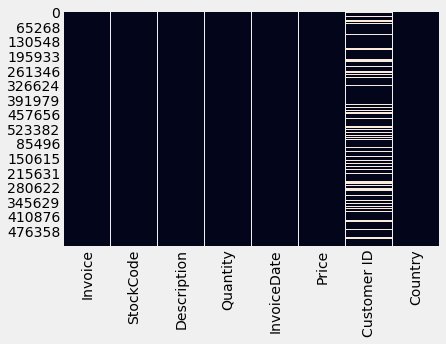

In [17]:
sns.heatmap(df_year_2009_2011.isnull(), cbar=False)


In [18]:
# Check the null values

df_year_2009_2011.isnull().sum()

Invoice        0     
StockCode      0     
Description    4275  
Quantity       0     
InvoiceDate    0     
Price          0     
Customer ID    235151
Country        0     
dtype: int64

#### <font color='blue'> The null values will be treated after further understanding the data</font>

<AxesSubplot:xlabel='InvoiceDate'>

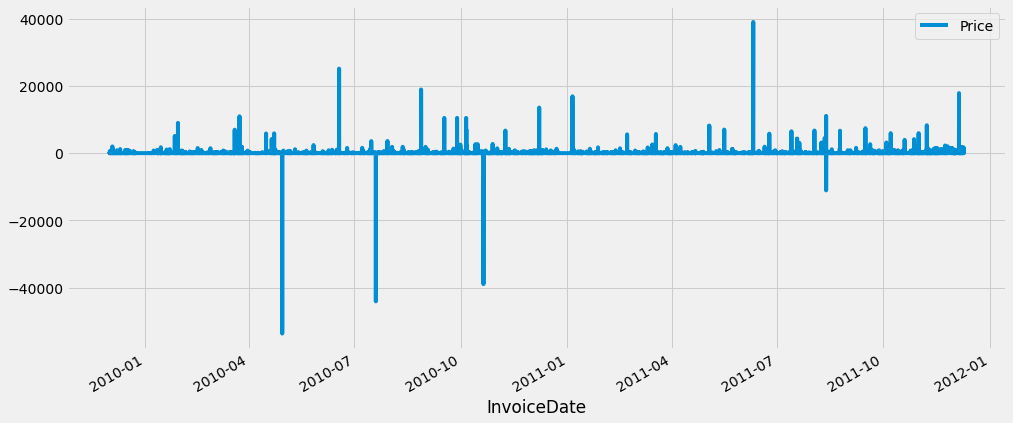

In [19]:
#basic univariate analysis to check Price distibution
df_year_2009_2011.plot(x = 'InvoiceDate', y = 'Price',figsize=(15,7) )

<AxesSubplot:xlabel='InvoiceDate'>

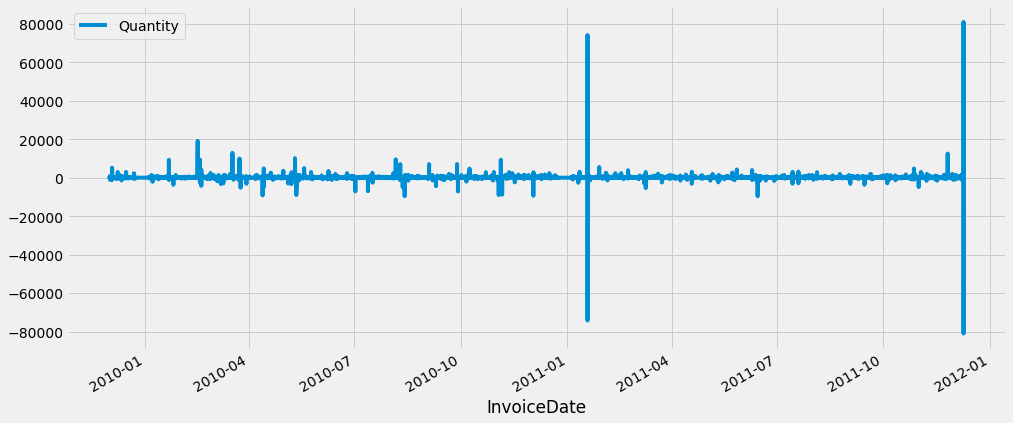

In [20]:
df_year_2009_2011.plot(x = 'InvoiceDate', y = 'Quantity',figsize=(15,7) )

In [21]:
df_year_2009_2011.corr()

Quantity     Price  Customer ID
Quantity     1.000000 -0.001317 -0.005171   
Price       -0.001317  1.000000 -0.003789   
Customer ID -0.005171 -0.003789  1.000000

<AxesSubplot:>

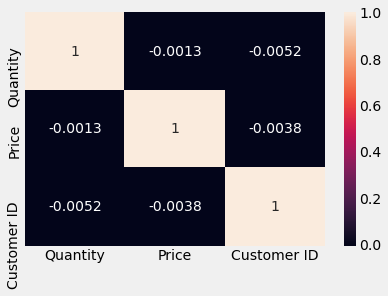

In [22]:
sns.heatmap(df_year_2009_2011.corr(),annot=True)

###### No corelation exists

## Automated Data Pofiling using Pandas profile

In [23]:
from IPython.display import IFrame
IFrame(src='Customer_profiling.html', width=900, height=600)

###### <font color='blue'>There are 235151 customers id which are null, Lets understand these records </font>

In [24]:
df_year_2009_2011_null_customers=df_year_2009_2011[df_year_2009_2011['Customer ID'].isnull()]
df_year_2009_2011_null_customers.head(5)

Invoice StockCode                Description  Quantity  \
263  489464  21733     85123a mixed              -96         
283  489463  71477     short                     -240        
284  489467  85123A    21733 mixed               -192        
470  489521  21646     NaN                       -50         
577  489525  85226C    BLUE PULL BACK RACING CAR  1          

            InvoiceDate  Price  Customer ID         Country  
263 2009-12-01 10:52:00  0.00  NaN           United Kingdom  
283 2009-12-01 10:52:00  0.00  NaN           United Kingdom  
284 2009-12-01 10:53:00  0.00  NaN           United Kingdom  
470 2009-12-01 11:44:00  0.00  NaN           United Kingdom  
577 2009-12-01 11:49:00  0.55  NaN           United Kingdom

In [25]:
print("Total transactions with customers with null ID",\
      round(df_year_2009_2011_null_customers.shape[0]/df_year_2009_2011.shape[0]*100,2),"%")    

Total transactions with customers with null ID 22.76 %


###### <font color='blue'>There are transactions with negative quantites</font>

In [26]:
df_year_2009_2011_null_customers["Negative_Quantity"] = np.where(df_year_2009_2011_null_customers.Quantity<0, True, False) 
df_year_2009_2011_null_customers.groupby("Negative_Quantity").count() #1033036

Invoice  StockCode  Description  Quantity  InvoiceDate  \
Negative_Quantity                                                           
False              231045   231045     229403       231045    231045        
True               4106     4106       1473         4106      4106          

                    Price  Customer ID  Country  
Negative_Quantity                                
False              231045  0            231045   
True               4106    0            4106

In [27]:
#df_year_2009_2011_null_customers['Negative_Quantity'].sum()
df_year_2009_2011_null_customers[['Invoice','Negative_Quantity']].groupby("Negative_Quantity").count()/df_year_2009_2011.shape[0]


Invoice
Negative_Quantity          
False              0.223656
True               0.003975

- <font color='blue'>4106 invoices have negative quantites </font>
- <font color='blue'><font color='blue'>UCI website clearly mentioned that invoice code with 'C' means cancellations</font>
- <font color='blue'>Valid customer id is very important for this study hence all the null customer id rows will be deleted </font>
- <font color='blue'>0.39% of transactions made by unknown customers are with negative quantity</font>

In [28]:
df_year_2009_2011_clean = df_year_2009_2011[~df_year_2009_2011['Customer ID'].isnull()]
df_year_2009_2011_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 797885 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      797885 non-null  object        
 1   StockCode    797885 non-null  object        
 2   Description  797885 non-null  object        
 3   Quantity     797885 non-null  int64         
 4   InvoiceDate  797885 non-null  datetime64[ns]
 5   Price        797885 non-null  float64       
 6   Customer ID  797885 non-null  float64       
 7   Country      797885 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 54.8+ MB


In [29]:
df_year_2009_2011_clean.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

#### Change customer id from float to int

In [30]:
#Change customer id from float to int
df_year_2009_2011_clean["Customer ID"]  = df_year_2009_2011_clean["Customer ID"].astype(int)

In [31]:
#This is to set the datetime columns dtypes to datetime.Ignore this if there is no datetime column in the data
for col in df_year_2009_2011_clean.columns:
    df_year_2009_2011_clean = df_year_2009_2011_clean.apply(lambda col: pd.to_datetime(col, errors='ignore') 
              if col.dtypes == object 
              else col, 
              axis=0)

In [32]:
df_year_2009_2011_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 797885 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      797885 non-null  object        
 1   StockCode    797885 non-null  object        
 2   Description  797885 non-null  object        
 3   Quantity     797885 non-null  int64         
 4   InvoiceDate  797885 non-null  datetime64[ns]
 5   Price        797885 non-null  float64       
 6   Customer ID  797885 non-null  int32         
 7   Country      797885 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 51.7+ MB


### <font color='blue'> 2.1 Variables Understanding and Feature engineering  </font>
Check the overall purchase value for each customer to understand the negative quantiy further

In [33]:
#Lets check the overall revenue generated by each customer during two years
df_year_2009_2011_clean['Revenue']=df_year_2009_2011_clean['Quantity']*df_year_2009_2011_clean['Price']

In [34]:
# Check all customers with abnormal revenue and investigate
df_abnormal_revenue= df_year_2009_2011_clean[df_year_2009_2011_clean['Revenue']<=0].groupby('Customer ID').sum()
df_abnormal_revenue.reset_index(level=0, inplace=True)
df_abnormal_revenue.head(100)

Customer ID  Quantity    Price   Revenue
0   12346       -74232     360.10  -77608.20
1   12349       -5         24.15   -24.15   
2   12352       -66        856.99  -960.63  
3   12359       -226       96.34   -221.05  
4   12360       -1         40.00   -40.00   
5   12362       -17        35.00   -71.65   
6   12365       -1         320.69  -320.69  
7   12375       -1         2.08    -2.08    
8   12379       -1         1.95    -1.95    
9   12380       -30        1536.75 -1788.30 
10  12381       -25        9.60    -41.35   
11  12382       -1         18.38   -18.38   
12  12383       -3         3.75    -11.25   
13  12384       -5         14.53   -19.11   
14  12385       -1         15.00   -15.00   
15  12391       -8         19.75   -25.60   
16  12393       -6         18.45   -22.70   
17  12395       -5         10.45   -20.35   
18  12402       -1         12.75   -12.75   
19  12403       -1         18.00   -18.00   
20  12406       -33        52.50   -318.15  
21  12408       -43        38.20   -61.13   
22  12409       -116       25.31   -328.82  
23  12410       -2         12.25   -12.25   
24  12412       -6         11.30   -15.90   
25  12413       -4         27.95   -63.95   
26  12414       -194       173.54  -260.00  
27  12415       -132       402.74  -1189.08 
28  12417       -14        79.00   -108.70  
29  12418       -1         4.25    -4.25    
30  12421       -5         2.02    -5.77    
31  12422       -5         1094.45 -1112.45 
32  12423       -12        0.85    -10.20   
33  12424       -10        21.10   -50.25   
34  12425       -44        9.40    -60.60   
35  12426       -7         22.90   -33.80   
36  12427       -297       18.91   -117.43  
37  12428       -33        58.33   -79.26   
38  12429       -120       0.42    -50.40   
39  12431       -56        33.26   -138.56  
40  12433       -1         152.40  -152.40  
41  12434       -21        14.50   -40.95   
42  12437       -69        105.30  -288.55  
43  12439       -30        5.75    -53.70   
44  12440       -23        15.45   -91.05   
45  12444        2         0.00     0.00    
46  12445       -2         4.25    -8.50    
47  12446        1         0.00     0.00    
48  12450       -7         8.05    -21.25   
49  12451       -133       5.05    -123.35  
50  12452       -2         1.00    -2.00    
51  12454       -5471      182.93  -12387.07
52  12456       -17        8.30    -27.15   
53  12457       -156       48.63   -523.60  
54  12462       -22        41.67   -65.58   
55  12463       -19        17.30   -41.15   
56  12465       -4         8.30    -8.30    
57  12467       -129       14.56   -132.80  
58  12468       -17        40.49   -46.19   
59  12471       -422       694.20  -1998.18 
60  12472       -400       295.61  -801.60  
61  12473       -76        1039.42 -1090.32 
62  12474       -153       194.78  -424.00  
63  12476       -96        262.30  -399.79  
64  12477       -33        18.91   -102.73  
65  12479       -34        8.70    -49.90   
66  12480       -5         19.85   -29.75   
67  12481       -138       3.61    -144.36  
68  12482       -3         1797.87 -1797.87 
69  12483       -27        188.76  -273.71  
70  12484       -11        52.30   -66.30   
71  12487       -30        0.85    -25.50   
72  12490       -4         1.25    -5.00    
73  12493       -1         16.95   -16.95   
74  12494       -27        66.25   -129.35  
75  12495       -4         17.00   -34.00   
76  12497       -1         36.75   -36.75   
77  12500       -17        58.95   -82.90   
78  12501       -61        27.83   -79.71   
79  12503       -1         1126.00 -1126.00 
80  12504       -39        60.60   -368.05  
81  12505       -11        22.90   -47.20   
82  12507        0         4.25    -46.75   
83  12510       -31        1448.49 -1488.69 
84  12511       -5         17.00   -18.25   
85  12513       -6         4.25    -25.50   
86  12517       -23        3.30    -37.95   
87  12519       -7         6.60    -31.35   

In [35]:
#Customers with Zero revenue
df_zero_revenue = df_abnormal_revenue[df_abnormal_revenue['Revenue']==0]
df_zero_revenue

Customer ID  Quantity  Price  Revenue
45    12444        2         0.0    0.0    
47    12446        1         0.0    0.0    
129   12603        1         0.0    0.0    
432   13256        12540     0.0    0.0    
833   14103        5         0.0    0.0    
1155  14827        5         0.0    0.0    
1266  15070        8         0.0    0.0    
1720  16126        12        0.0    0.0    
2296  17560        16        0.0    0.0    
2492  18071        12        0.0    0.0

In [36]:
df_zero_revenue.count()

Customer ID    10
Quantity       10
Price          10
Revenue        10
dtype: int64

###### <font color='red'>10 customers are have zero revenue. </font>

In [37]:
df_year_2009_2011_clean.count()

Invoice        797885
StockCode      797885
Description    797885
Quantity       797885
InvoiceDate    797885
Price          797885
Customer ID    797885
Country        797885
Revenue        797885
dtype: int64

<font color='blue'>Let's understand the transaction of few customers with abnormal quanties</font>

In [38]:
#Let's check customer with abnormally high negative quantity
df_year_2009_2011_clean[ (df_year_2009_2011_clean['Customer ID']==12346) ].\
sort_values('InvoiceDate')

Invoice StockCode                          Description  Quantity  \
27994   491725   TEST001   This is a test product.              10         
28251   491742   TEST001   This is a test product.              5          
28254   491744   TEST001   This is a test product.              5          
39398   492718   TEST001   This is a test product.              5          
39411   492722   TEST002   This is a test product.              1          
45228   493410   TEST001   This is a test product.              5          
45230   493412   TEST001   This is a test product.              5          
56117   494450   TEST001   This is a test product.              5          
66084   495295   TEST001   This is a test product.              5          
71080   C495800  ADJUST    Adjustment by john on 26/01/2010 17 -1          
107804  499763   15056P    EDWARDIAN PARASOL PINK               1          
107803  499763   15056BL   EDWARDIAN PARASOL BLACK              1          
107801  499763   20679     EDWARDIAN PARASOL RED                1          
107800  499763   20682     RED SPOTTY CHILDS UMBRELLA           1          
107802  499763   15056N    EDWARDIAN PARASOL NATURAL            1          
253039  513774   22365     DOORMAT RESPECTABLE HOUSE            1          
253046  513774   21955     DOORMAT UNION JACK GUNS AND ROSES    1          
253045  513774   20685     DOORMAT RED SPOT                     1          
253044  513774   22366     DOORMAT AIRMAIL                      1          
253043  513774   48187     DOORMAT NEW ENGLAND                  1          
253042  513774   48188     DOORMAT WELCOME PUPPIES              1          
253041  513774   22688     DOORMAT PEACE ON EARTH BLUE          1          
253040  513774   48185     DOORMAT FAIRY CAKE                   1          
253038  513774   22689     DOORMAT MERRY CHRISTMAS RED          1          
253036  513774   21523     DOORMAT FANCY FONT HOME SWEET HOME   1          
253035  513774   22690     DOORMAT HOME SWEET HOME BLUE         1          
253034  513774   48111     DOORMAT 3 SMILEY CATS                1          
253033  513774   22691     DOORMAT WELCOME SUNRISE              1          
253032  513774   48173C    DOORMAT BLACK FLOCK                  1          
253031  513774   22687     DOORMAT CHRISTMAS VILLAGE            1          
253030  513774   22660     DOORMAT I LOVE LONDON                1          
253029  513774   22692     DOORMAT WELCOME TO OUR HOME          1          
253028  513774   21524     DOORMAT SPOTTY HOME SWEET HOME       1          
253037  513774   48138     DOORMAT UNION FLAG                   1          
255587  C514024  M         Manual                              -1          
255595  C514024  M         Manual                              -1          
255594  C514024  M         Manual                              -1          
255593  C514024  M         Manual                              -4          
255592  C514024  M         Manual                              -1          
255586  C514024  M         Manual                              -1          
255590  C514024  M         Manual                              -1          
255588  C514024  M         Manual                              -1          
255591  C514024  M         Manual                              -3          
370048  C525099  D         Discount                            -1          
371779  C525274  TEST001   This is a test product.             -1          
61619   541431   23166     MEDIUM CERAMIC TOP STORAGE JAR       74215      
61624   C541433  23166     MEDIUM CERAMIC TOP STORAGE JAR      -74215      

               InvoiceDate   Price  Customer ID         Country   Revenue  
27994  2009-12-14 08:34:00  4.50    12346        United Kingdom  45.00     
28251  2009-12-14 11:00:00  4.50    12346        United Kingdom  22.50     
28254  2009-12-14 11:02:00  4.50    12346        United Kingdom  22.50     
39398  2009-12-18 10:47:00  4.50    12346        United

- 74215 "MEDIUM CERAMIC TOP STORAGE JAR" has been purchased and then returned on the same day.

- Also there are stock codes with entries like "MANUAL" and "This is a test product"

- Invoice code starts with character "C"

###### <font color='red'>In UCI website it's mentioned that invoice code with 'C' means cancellations but after looking into this customers transaction we can not delete the cancelled transactions with the character "C" directly without analysing it throughly</font>



In [39]:
df_year_2009_2011_Neg_quantity_customers=df_year_2009_2011_clean[df_year_2009_2011_clean['Quantity']<0]
df_year_2009_2011_Neg_quantity_customers.count()

Invoice        18390
StockCode      18390
Description    18390
Quantity       18390
InvoiceDate    18390
Price          18390
Customer ID    18390
Country        18390
Revenue        18390
dtype: int64

In [40]:
# Set a cancel flag to these customers as we will link this back to the main clean data
df_year_2009_2011_Neg_quantity_customers["Cancelled_Invoice"] = df_year_2009_2011_Neg_quantity_customers['Invoice'].\
str.contains('C')


###### The same invoices are cancelled overall also

In [41]:
test=df_year_2009_2011_clean.copy()
test["Cancelled_Invoice"] = df_year_2009_2011_clean['Invoice'].str.contains('C')
test.groupby("Cancelled_Invoice").count()   
 

Invoice  StockCode  Description  Quantity  InvoiceDate  \
Cancelled_Invoice                                                           
True               18390    18390      18390        18390     18390         

                   Price  Customer ID  Country  Revenue  
Cancelled_Invoice                                        
True               18390  18390        18390    18390

###### <font color='blue'>This ensure that all the invoice codes starting from "C" has negative quantity. All negative quantities are cancelled transactions but it is essential to understand how other transactions happed by the same customer</font>

In [42]:
print ("CASE 1")
df_year_2009_2011_clean[ (df_year_2009_2011_clean['Customer ID']==16321) & (df_year_2009_2011_clean['StockCode']==22087)].\
sort_values('InvoiceDate')

CASE 1


Invoice StockCode               Description  Quantity  \
178    C489449  22087     PAPER BUNTING WHITE LACE -12         
187    489450   22087     PAPER BUNTING WHITE LACE  12         
64609  541657   22087     PAPER BUNTING WHITE LACE  6          
84270  543372   22087     PAPER BUNTING WHITE LACE  18         
84300  C543375  22087     PAPER BUNTING WHITE LACE -18         
84302  543376   22087     PAPER BUNTING WHITE LACE  18         

              InvoiceDate  Price  Customer ID    Country  Revenue  
178   2009-12-01 10:33:00  2.95   16321        Australia -35.4     
187   2009-12-01 10:36:00  2.95   16321        Australia  35.4     
64609 2011-01-20 12:11:00  2.95   16321        Australia  17.7     
84270 2011-02-07 15:01:00  2.95   16321        Australia  53.1     
84300 2011-02-07 15:09:00  2.95   16321        Australia -53.1     
84302 2011-02-07 15:10:00  2.95   16321        Australia  53.1

In [43]:
print ("CASE 2")
df_year_2009_2011_clean[ (df_year_2009_2011_clean['Customer ID']==17592) & (df_year_2009_2011_clean['StockCode']=='90200A')].\
sort_values('InvoiceDate')

CASE 2


Invoice StockCode                 Description  Quantity  \
196  C489459  90200A    PURPLE SWEETHEART BRACELET -3          
252  489462   90200A    PURPLE SWEETHEART BRACELET  3          

            InvoiceDate  Price  Customer ID         Country  Revenue  
196 2009-12-01 10:44:00  4.25   17592        United Kingdom -12.75    
252 2009-12-01 10:49:00  4.25   17592        United Kingdom  12.75

In [44]:
print ("CASE 3")
df_year_2009_2011_clean[ (df_year_2009_2011_clean['Customer ID']==17345) & (df_year_2009_2011_clean['StockCode']==21329)].\
sort_values('InvoiceDate')

CASE 3


Invoice StockCode              Description  Quantity  \
2896  C489636  21329     DINOSAURS  WRITING SET  -8          

             InvoiceDate  Price  Customer ID         Country  Revenue  
2896 2009-12-01 15:34:00  1.65   17345        United Kingdom -13.2

In [45]:
print ("CASE 4")
df_year_2009_2011_clean[ (df_year_2009_2011_clean['Customer ID']==15299) ].\
sort_values('InvoiceDate')

CASE 4


Invoice StockCode                       Description  Quantity  \
735     C489535  D         Discount                         -1          
736     C489535  D         Discount                         -1          
52638   494210   84856S    SMALL TAHITI BEACH BAG            192        
367054  524971   22112     CHOCOLATE HOT WATER BOTTLE        144        
464418  533254   22112     CHOCOLATE HOT WATER BOTTLE        72         
507788  536809   84950     ASSORTED COLOUR T-LIGHT HOLDER    1824       
507789  536810   21833     CAMOUFLAGE LED TORCH              204        
507790  536811   22275     WEEKEND BAG VINTAGE ROSE PAISLEY  69         
88071   C543758  D         Discount                         -1          
127041  547154   22969     HOMEMADE JAM SCENTED CANDLES      480        
155728  C550010  84950     ASSORTED COLOUR T-LIGHT HOLDER   -4          
155729  C550010  84856S    SMALL TAHITI BEACH BAG           -1          
221764  C556274  M         Manual                           -1          
242907  558381   M         Manual                            1          
293839  C562622  M         Manual                           -1          
373658  569339   22113     GREY HEART HOT WATER BOTTLE       250        
373659  569340   21115     ROSE CARAVAN DOORSTOP             120        

               InvoiceDate   Price  Customer ID         Country  Revenue  
735    2009-12-01 12:11:00  9.00    15299        United Kingdom -9.00     
736    2009-12-01 12:11:00  19.00   15299        United Kingdom -19.00    
52638  2010-01-12 11:34:00  3.81    15299        United Kingdom  731.52   
367054 2010-10-01 14:55:00  4.25    15299        United Kingdom  612.00   
464418 2010-11-16 15:11:00  4.25    15299        United Kingdom  306.00   
507788 2010-12-02 16:48:00  0.55    15299        United Kingdom  1003.20  
507789 2010-12-02 16:50:00  1.49    15299        United Kingdom  303.96   
507790 2010-12-02 16:51:00  7.65    15299        United Kingdom  527.85   
88071  2011-02-11 15:07:00  65.91   15299        United Kingdom -65.91    
127041 2011-03-21 12:06:00  1.25    15299        United Kingdom  600.00   
155728 2011-04-14 10:29:00  0.55    15299        United Kingdom -2.20     
155729 2011-04-14 10:29:00  3.81    15299        United Kingdom -3.81     
221764 2011-06-09 19:46:00  600.00  15299        United Kingdom -600.00   
242907 2011-06-28 17:01:00  600.00  15299        United Kingdom  600.00   
293839 2011-08-08 12:37:00  48.00   15299        United Kingdom -48.00    
373658 2011-10-03 14:18:00  3.32    15299        United Kingdom  830.00   
373659 2011-10-03 14:19:00  5.35    15299        United Kingdom  642.00

In [46]:
print ("CASE 5")
df_year_2009_2011_clean[ (df_year_2009_2011_clean['Customer ID']==16321) ].\
sort_values('InvoiceDate')

CASE 5


Invoice StockCode                         Description  Quantity  \
178     C489449  22087     PAPER BUNTING WHITE LACE           -12         
179     C489449  85206A    CREAM FELT EASTER EGG BASKET       -6          
180     C489449  21895     POTTING SHED SOW 'N' GROW SET      -4          
181     C489449  21896     POTTING SHED TWINE                 -6          
182     C489449  22083     PAPER CHAIN KIT RETRO SPOT         -12         
183     C489449  21871     SAVE THE PLANET MUG                -12         
184     C489449  84946     ANTIQUE SILVER TEA GLASS ETCHED    -12         
185     C489449  84970S    HANGING HEART ZINC T-LIGHT HOLDER  -24         
186     C489449  22090     PAPER BUNTING RETRO SPOTS          -12         
194     489450   84970S    HANGING HEART ZINC T-LIGHT HOLDER   24         
193     489450   84946     ANTIQUE SILVER TEA GLASS ETCHED     12         
192     489450   21871     SAVE THE PLANET MUG                 12         
191     489450   22083     PAPER CHAIN KIT RETRO SPOT          12         
195     489450   22090     PAPER BUNTING RETRO SPOTS           12         
189     489450   21895     POTTING SHED SOW 'N' GROW SET       4          
188     489450   85206A    CREAM FELT EASTER EGG BASKET        6          
187     489450   22087     PAPER BUNTING WHITE LACE            12         
190     489450   21896     POTTING SHED TWINE                  6          
135099  502275   85206A    CREAM FELT EASTER EGG BASKET        12         
135100  502275   22585     PACK OF 6 BIRDY GIFT TAGS           12         
64609   541657   22087     PAPER BUNTING WHITE LACE            6          
64610   541657   85123A    WHITE HANGING HEART T-LIGHT HOLDER  6          
64611   541657   21056     DOCTOR'S BAG SOFT TOY               3          
64612   541657   22960     JAM MAKING SET WITH JARS            6          
84271   543372   22325     MOBILE VINTAGE HEARTS               3          
84270   543372   22087     PAPER BUNTING WHITE LACE            18         
84299   C543375  22325     MOBILE VINTAGE HEARTS              -3          
84300   C543375  22087     PAPER BUNTING WHITE LACE           -18         
84301   543376   22325     MOBILE VINTAGE HEARTS               3          
84302   543376   22087     PAPER BUNTING WHITE LACE            18         
364931  568687   22090     PAPER BUNTING RETROSPOT             12         
364932  568687   21198     WHITE HEART CONFETTI IN TUBE        24         
365078  C568694  22090     PAPER BUNTING RETROSPOT            -12         
365079  C568694  21198     WHITE HEART CONFETTI IN TUBE       -24         
365080  568695   22090     PAPER BUNTING RETROSPOT             12         
365081  568695   21198     WHITE HEART CONFETTI IN TUBE        24         

               InvoiceDate  Price  Customer ID    Country  Revenue  
178    2009-12-01 10:33:00  2.95   16321        Australia -35.40    
179    2009-12-01 10:33:00  1.65   16321        Australia -9.90     
180    2009-12-01 10:33:00  4.25   16321        Australia -17.00    
181    2009-12-01 10:33:00  2.10   16321        Australia -12.60    
182    2009-12-01 10:33:00  2.95   16321        Australia -35.40    
183    2009-12-01 10:33:00  1.25   16321        Australia -15.00    
184    2009-12-01 10:33:00  1.25   16321        Australia -15.00    
185    2009-12-01 10:33:00  0.85   16321        Australia -20.40    
186    2009-12-01 10:33:00  2.95   16321        Australia -35.40    
194    2009-12-01 10:36:00  0.85   16321        Australia  20.40    
193    2009-12-01 10:36:00  1.25   16321        Australia  15.00    
192    2009-12-01 10:36:00  1.25   16321        Australia  15.00    
191    2009-12-01 10:36:00  2.95   16321        Australia  35.40    
195    2009-12-01 10:36:00  2.95   16321        Australia  35.40    
189    2009-12-01 10:36:00  4.25   16321        Australia  17.00    
188    2009-12-01 10:36:00  1.65   16321        Australia  9.90     
187    2009-12-01 10:36:00  2.95   16321        Australia  

In [47]:
print ("CASE 6")
df_year_2009_2011_clean[ (df_year_2009_2011_clean['Customer ID']==17592) ].\
sort_values('InvoiceDate')

CASE 6


Invoice StockCode                          Description  Quantity  \
196  C489459  90200A    PURPLE SWEETHEART BRACELET          -3          
207  C489459  90209A    PURPLE ENAMEL+GLASS HAIR COMB       -3          
206  C489459  90209C    PINK ENAMEL+GLASS HAIR COMB         -3          
205  C489459  90003B    ROSE COLOUR PAIR HEART HAIR SLIDES  -3          
204  C489459  90003D    CRYSTAL PAIR HEART HAIR SLIDES      -3          
203  C489459  90003C    MIDNIGHT BLUE PAIR HEART HAIR SLIDE -3          
208  C489459  90082D    DIAMANTE BOW BROOCH BLACK COLOUR    -2          
201  C489459  90185C    BLACK DIAMANTE EXPANDABLE RING      -3          
200  C489459  90200C    BLUE SWEETHEART BRACELET            -3          
199  C489459  90200E    GREEN SWEETHEART BRACELET           -3          
198  C489459  90200B    BLACK SWEETHEART BRACELET           -3          
197  C489459  90200D    PINK SWEETHEART BRACELET            -3          
202  C489459  90185B    AMETHYST DIAMANTE EXPANDABLE RING   -3          
260  489462   90209C    PINK ENAMEL+GLASS HAIR COMB          3          
259  489462   90003B    ROSE COLOUR PAIR HEART HAIR SLIDES   3          
258  489462   90003D    CRYSTAL PAIR HEART HAIR SLIDES       3          
257  489462   90003C    MIDNIGHT BLUE PAIR HEART HAIR SLIDE  3          
256  489462   90185B    AMETHYST DIAMANTE EXPANDABLE RING    3          
253  489462   90200C    BLUE SWEETHEART BRACELET             3          
254  489462   90200B    BLACK SWEETHEART BRACELET            3          
252  489462   90200A    PURPLE SWEETHEART BRACELET           3          
245  489462   90200E    GREEN SWEETHEART BRACELET            3          
244  489462   90200D    PINK SWEETHEART BRACELET             3          
261  489462   90209A    PURPLE ENAMEL+GLASS HAIR COMB        3          
255  489462   90185C    BLACK DIAMANTE EXPANDABLE RING       3          
262  489462   90082D    DIAMANTE BOW BROOCH BLACK COLOUR     2          

            InvoiceDate  Price  Customer ID         Country  Revenue  
196 2009-12-01 10:44:00  4.25   17592        United Kingdom -12.75    
207 2009-12-01 10:44:00  2.10   17592        United Kingdom -6.30     
206 2009-12-01 10:44:00  2.10   17592        United Kingdom -6.30     
205 2009-12-01 10:44:00  3.75   17592        United Kingdom -11.25    
204 2009-12-01 10:44:00  3.75   17592        United Kingdom -11.25    
203 2009-12-01 10:44:00  3.75   17592        United Kingdom -11.25    
208 2009-12-01 10:44:00  6.35   17592        United Kingdom -12.70    
201 2009-12-01 10:44:00  4.25   17592        United Kingdom -12.75    
200 2009-12-01 10:44:00  4.25   17592        United Kingdom -12.75    
199 2009-12-01 10:44:00  4.25   17592        United Kingdom -12.75    
198 2009-12-01 10:44:00  4.25   17592        United Kingdom -12.75    
197 2009-12-01 10:44:00  4.25   17592        United Kingdom -12.75    
202 2009-12-01 10:44:00  4.25   17592        United Kingdom -12.75    
260 2009-12-01 10:49:00  2.10   17592        United Kingdom  6.30     
259 2009-12-01 10:49:00  3.75   17592        United Kingdom  11.25    
258 2009-12-01 10:49:00  3.75   17592        United Kingdom  11.25    
257 2009-12-01 10:49:00  3.75   17592        United Kingdom  11.25    
256 2009-12-01 10:49:00  4.25   17592        United Kingdom  12.75    
253 2009-12-01 10:49:00  4.25   17592        United Kingdom  12.75    
254 2009-12-01 10:49:00  4.25   17592        United Kingdom  12.75    
252 2009-12-01 10:49:00  4.25   17592        United Kingdom  12.75    
245 2009-12-01 10:49:00  4.25   17592        United Kingdom  12.75    
244 2009-12-01 10:49:00  4.25   17592        United Kingdom  12.75    
261 2009-12-01 10:49:00  2.10   17592        United Kingdom  6.30     
255 2009-12-01 10:49:00  4.25   17592        United Kingdom  12.75    
262 2009-12-01 10:49:00  6.35   17592        United Kingdom  12.70

In [48]:
print ("CASE 7")
df_year_2009_2011_clean[ (df_year_2009_2011_clean['Customer ID']==13526) ].\
sort_values('InvoiceDate')

CASE 7


Invoice StockCode                          Description  Quantity  \
1257  489560   17164D    ASS COL SMALL SAND FROG P'WEIGHT     288        
1286  489560   35957     SMALLFOLKART BAUBLE CHRISTMAS DEC    144        
1285  489560   35955     SMALL FOLKART CHRISTMAS TREE DEC     96         
1284  489560   21034     REX CASH+CARRY JUMBO SHOPPER         1          
1282  489560   90090     PINK CRYSTAL HEART PHONE CHARM       24         
1281  489560   90084     PINK CRYSTAL GUITAR PHONE CHARM      12         
1280  489560   90093     CLEAR CRYSTAL STAR PHONE CHARM       24         
1279  489560   90085     CRYSTAL STILETTO PHONE CHARM         81         
1278  489560   90092     BLUE CRYSTAL BOOT PHONE CHARM        24         
1277  489560   90087     CRYSTAL SEA HORSE PHONE CHARM        48         
1276  489560   35933     PINK STOCKING CHRISTMAS DECORATION   48         
1275  489560   35931     PINK STAR CHRISTMAS DECORATION       48         
1274  489560   21034     REX CASH+CARRY JUMBO SHOPPER         3          
1273  489560   84270     ASSTD DESIGN BUBBLE GUM RING         90         
1272  489560   84327A    PINK JUMPER LARRY THE LAMB           3          
1283  489560   90088     CRYSTAL KEY+LOCK PHONE CHARM         24         
1270  489560   84578     ELEPHANT TOY WITH BLUE T-SHIRT       1          
1258  489560   17165D    ASS COL LARGE SAND FROG P'WEIGHT     108        
1259  489560   17165B    ASS COL LARGE SAND GECKO P'WEIGHT    288        
1260  489560   35955     SMALL FOLKART CHRISTMAS TREE DEC     33         
1261  489560   85208     SET/12 FUNKY FELT FLOWER PEG IN BAG  1          
1263  489560   90092     BLUE CRYSTAL BOOT PHONE CHARM        3          
1262  489560   90090     PINK CRYSTAL HEART PHONE CHARM       12         
1265  489560   22155     STAR DECORATION RUSTIC               12         
1266  489560   35160     BUDDHA INCENSE HOLDER ASSORTED       8          
1267  489560   17108D    FLOWER FAIRY SUMMER BOUQUET SACHET   12         
1268  489560   21805     WHITE CHRISTMAS TREE DECORATION      36         
1269  489560   90125A    PINK BERTIE GLASS BEAD BAG CHARM     12         
1264  489560   16161C    WRAP SPEED DEMONS                    100        
1271  489560   84901     BLACK FACE LAMB WITH PANTS           1          
1358  C489563  90092     BLUE CRYSTAL BOOT PHONE CHARM       -24         
1361  C489563  90090     PINK CRYSTAL HEART PHONE CHARM      -12         
1360  C489563  90092     BLUE CRYSTAL BOOT PHONE CHARM       -3          
1359  C489563  90087     CRYSTAL SEA HORSE PHONE CHARM       -48         
1357  C489563  90085     CRYSTAL STILETTO PHONE CHARM        -81         
1355  C489563  90084     PINK CRYSTAL GUITAR PHONE CHARM     -12         
1354  C489563  90090     PINK CRYSTAL HEART PHONE CHARM      -24         
1353  C489563  90088     CRYSTAL KEY+LOCK PHONE CHARM        -24         
1356  C489563  90093     CLEAR CRYSTAL STAR PHONE CHARM      -24         
1374  489564   90084     PINK CRYSTAL GUITAR PHONE CHARM      12         
1373  489564   90090     PINK CRYSTAL HEART PHONE CHARM       24         
1372  489564   90088     CRYSTAL KEY+LOCK PHONE CHARM         24         
1371  489564   90090     PINK CRYSTAL HEART PHONE CHARM       12         
1370  489564   90092     BLUE CRYSTAL BOOT PHONE CHARM        3          
1369  489564   90087     CRYSTAL SEA HORSE PHONE CHARM        48         
1367  489564   90085     CRYSTAL STILETTO PHONE CHARM         81         
1366  489564   90125A    PINK BERTIE GLASS BEAD BAG CHARM     12         
1365  489564   90214H    LETTER "H" BLING KEY RING            2          
1364  489564   90125D    PURPLE BERTIE GLASS BEAD BAG CHARM   12         
1363  489564   90125C    TURQUOISE BERTIE GLASS BEAD CHARM    12         
1362  489564   90090     PINK CRYSTAL HEART PHONE CHARM       36         
1375  489564   90093     CLEAR CRYSTAL STAR PHONE CHARM       24         
1368  489564   90092     BLUE CRYSTAL BOOT PHONE CHARM        24         
1376  C489

In [49]:
print ("CASE 8")
df_year_2009_2011_clean[ (df_year_2009_2011_clean['Customer ID']==16446) ].\
sort_values('InvoiceDate')

CASE 8


Invoice StockCode                  Description  Quantity  \
371780  C525275  TEST001   This is a test product.     -2          
194354  553573   22980     PANTRY SCRUBBING BRUSH       1          
194355  553573   22982     PANTRY PASTRY BRUSH          1          
540421  581483   23843     PAPER CRAFT , LITTLE BIRDIE  80995      
540422  C581484  23843     PAPER CRAFT , LITTLE BIRDIE -80995      

               InvoiceDate  Price  Customer ID         Country    Revenue  
371780 2010-10-04 16:38:00  4.50   16446        United Kingdom -9.00       
194354 2011-05-18 09:52:00  1.65   16446        United Kingdom  1.65       
194355 2011-05-18 09:52:00  1.25   16446        United Kingdom  1.25       
540421 2011-12-09 09:15:00  2.08   16446        United Kingdom  168469.60  
540422 2011-12-09 09:27:00  2.08   16446        United Kingdom -168469.60

- <font color='blue'>Looking to Case 1  On the first look it appears that most of the cancelled transactions have another first valid transaction but it is worth noticing that the cancelled transaction time before the valid transaction</font> 



- <font color='blue'> Looking to case 4 it appeaars that some transactions are cancelled becasue it was considered as discount and also it is not necessary that the canceled transaction have a matching non negative transaction</font> 


- <font color='blue'> Looking to case 8 it appears that the transaction cancelled after it is purchased in two different transaction</font> 
 

- <font color='blue'>There are some cancelled transaction for which matching buying records does ot exists</font>


##### <font color='red'>Here i am assuming that the same transaction got cancelled and the similar transaction is appearing becasue customer change the mind and purchased it again.  </font>

##### <font color='blue'>Let's understand the stock code as we have seen "TEST" earlier</font>

In [50]:
list_special_codes = df_year_2009_2011_clean[df_year_2009_2011_clean['StockCode'].\
                                             str.contains('^[a-zA-Z]+', regex=True, na=False)]['StockCode'].unique()
list_special_codes

array(['POST', 'D', 'M', 'C2', 'BANK CHARGES', 'TEST001', 'TEST002',
       'PADS', 'ADJUST', 'ADJUST2', 'SP1002', 'DOT', 'CRUK'], dtype=object)

In [51]:
for code in list_special_codes:
    print("{:<15} -> {:<30}".format(code, df_year_2009_2011_clean[df_year_2009_2011_clean['StockCode'] == code]\
                                    ['Description'].unique()[0])) 

POST            -> POSTAGE                       
D               -> Discount                      
M               -> Manual                        
C2              -> CARRIAGE                      
BANK CHARGES    ->  Bank Charges                 
TEST001         -> This is a test product.       
TEST002         -> This is a test product.       
PADS            -> PADS TO MATCH ALL CUSHIONS    
ADJUST          -> Adjustment by john on 26/01/2010 16
ADJUST2         -> Adjustment by Peter on Jun 25 2010 
SP1002          -> KID'S CHALKBOARD/EASEL        
DOT             -> DOTCOM POSTAGE                
CRUK            -> CRUK Commission               


In [52]:
df_year_2009_2011_clean.dropna(axis = 0, subset = ['Customer ID'], inplace = True)
print('Dataframe dimensions:', df_year_2009_2011_clean.shape)
#____________________________________________________________
# gives some infos on columns types and numer of null values
tab_info=pd.DataFrame(df_year_2009_2011_clean.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(df_year_2009_2011_clean.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(df_year_2009_2011_clean.isnull().sum()/df_year_2009_2011_clean.shape[0]*100).T.
                         rename(index={0:'null values (%)'}))
display(tab_info)

Dataframe dimensions: (797885, 9)


Invoice StockCode Description Quantity     InvoiceDate  \
column type       object  object    object      int64    datetime64[ns]   
null values (nb)  0       0         0           0        0                
null values (%)   0.0     0.0       0.0         0.0      0.0              

                    Price Customer ID Country  Revenue  
column type       float64  int32       object  float64  
null values (nb)  0        0           0       0        
null values (%)   0.0      0.0         0.0     0.0

###### No null values

### <font color='blue'>Check shopping done across the world on cleaned data</font> 

In [53]:
temp = df_year_2009_2011_clean[['Customer ID', 'Invoice', 'Country']].groupby(['Customer ID', 'Invoice', 'Country']).count()
temp = temp.reset_index(drop = False)
countries = temp['Country'].value_counts()
print('Total number of countries: {}'.format(len(countries)))


Total number of countries: 41


In [54]:
round((countries/countries.sum())*100,2)

United Kingdom          90.26
Germany                 2.44 
France                  1.64 
EIRE                    1.62 
Netherlands             0.56 
Spain                   0.42 
Belgium                 0.41 
Sweden                  0.29 
Portugal                0.27 
Switzerland             0.27 
Australia               0.26 
Italy                   0.21 
Channel Islands         0.18 
Finland                 0.15 
Japan                   0.12 
Denmark                 0.12 
Norway                  0.12 
Austria                 0.11 
Cyprus                  0.10 
Poland                  0.08 
USA                     0.06 
Greece                  0.05 
Unspecified             0.04 
Malta                   0.04 
United Arab Emirates    0.03 
Singapore               0.03 
Israel                  0.02 
Iceland                 0.02 
Canada                  0.02 
Lithuania               0.01 
European Community      0.01 
Czech Republic          0.01 
Bahrain                 0.01 
Korea     

In [55]:
data = dict(type='choropleth',locations = countries.index,locationmode = 'country names', z = countries,
text = countries.index, colorbar = {'title':'Order nb.'},
colorscale=[[0, 'rgb(224,255,255)'],
            [0.01, 'rgb(166,206,227)'], [0.02, 'rgb(31,120,180)'],
            [0.03, 'rgb(178,223,138)'], [0.05, 'rgb(51,160,44)'],
            [0.10, 'rgb(251,154,153)'], [0.20, 'rgb(255,255,0)'],
            [1, 'rgb(227,26,28)']],    
reversescale = False)
#_______________________
layout = dict(title='Number of orders per country',
geo = dict(showframe = True, projection={'type':'mercator'}))
#______________
choromap = go.Figure(data = [data], layout = layout)
iplot(choromap, validate=False)

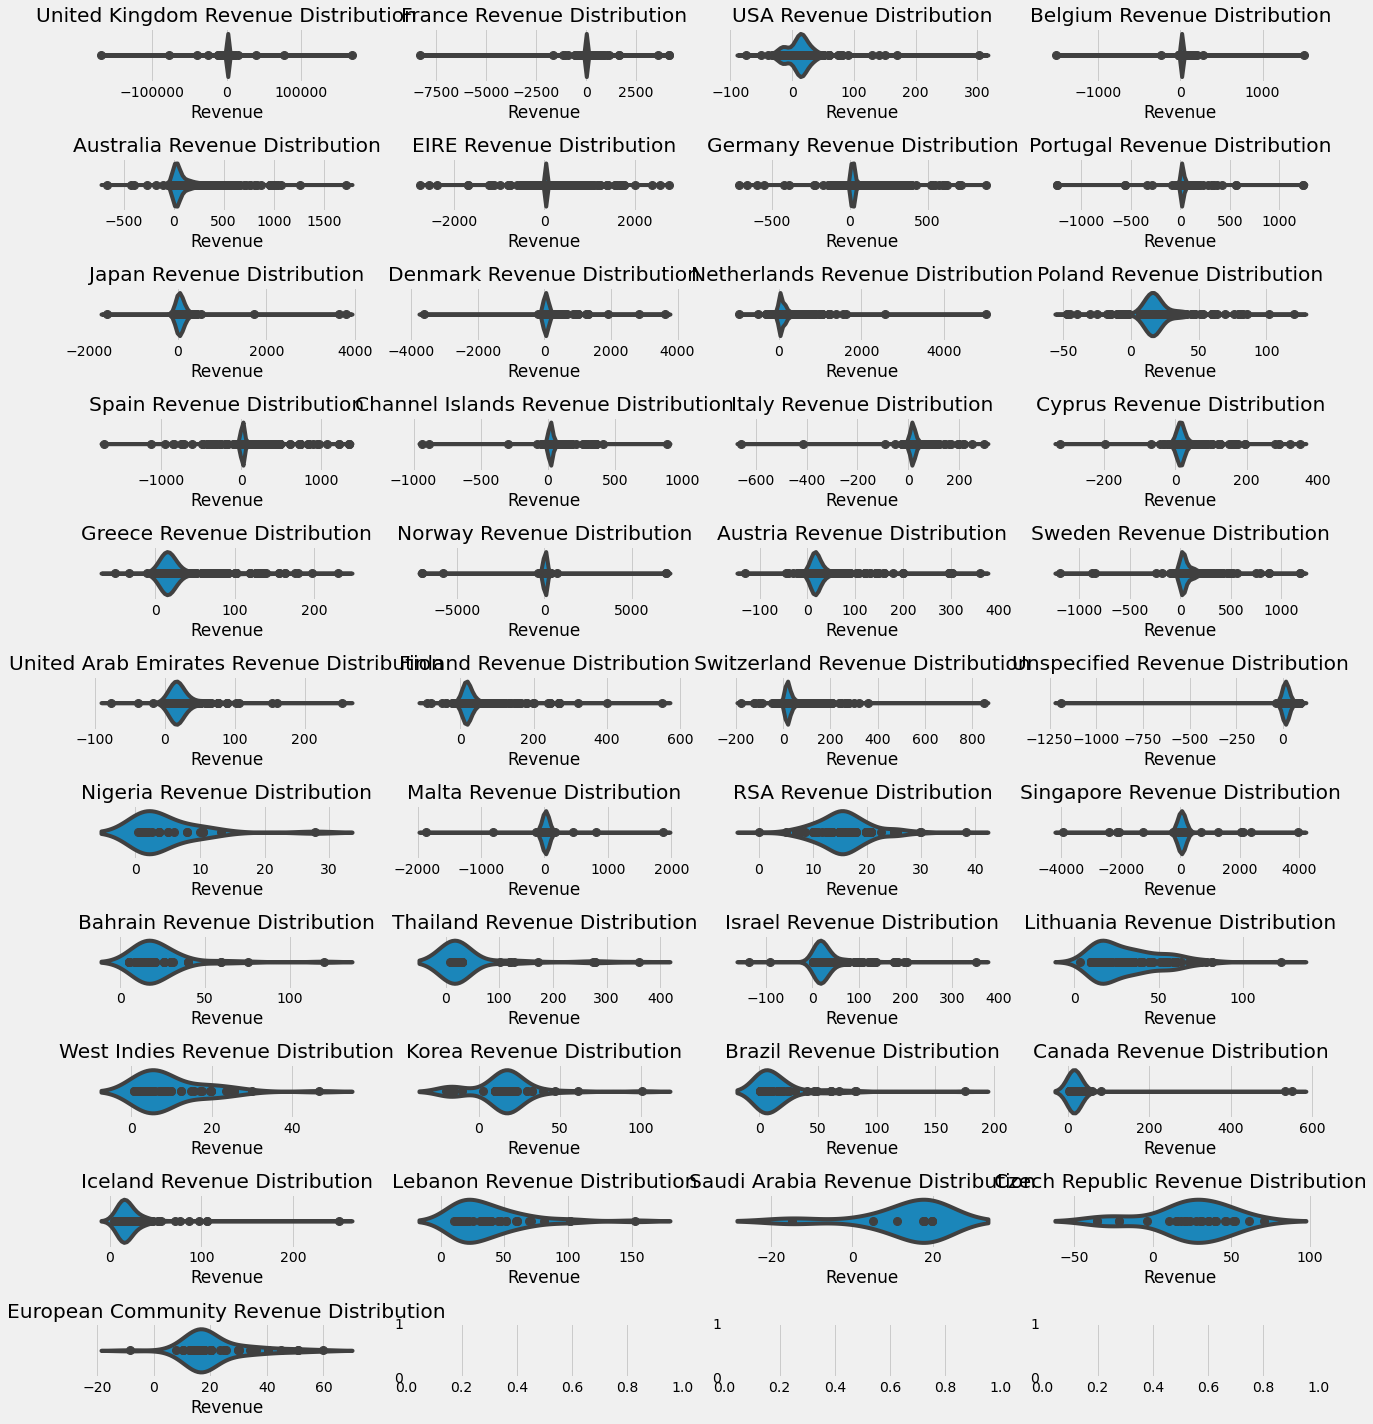

In [56]:
fig, ax = plt.subplots(11, 4, figsize=(18,20))
axes_ = [axes_row for axes in ax for axes_row in axes]

for i, c in enumerate(df_year_2009_2011_clean["Country"].unique()):
    sns.violinplot(x = "Revenue", data = df_year_2009_2011_clean[df_year_2009_2011_clean["Country"] == c], ax = axes_[i], inner = "point")#, palette = "pastel")
    axes_[i].set_title(str(c) + ' ' + "Revenue Distribution")
    plt.tight_layout()

###### <font color='darkgreen'>Top 10 contries in order of products quantities ordered</font>

<AxesSubplot:xlabel='Country'>

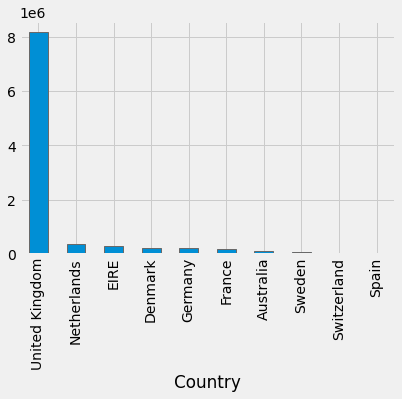

In [57]:
df_year_2009_2011_clean.groupby('Country')['Quantity'].sum().sort_values(ascending = False)[:10].plot(kind = 'bar')

###### <font color='darkgreen'>Top 10 contries with in order of revenue generated</font>

<AxesSubplot:xlabel='Country'>

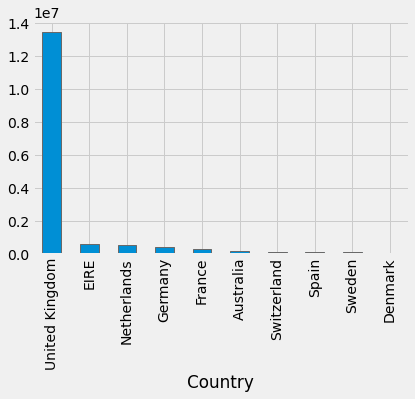

In [58]:
df_year_2009_2011_clean.groupby('Country')['Revenue'].sum().sort_values(ascending = False)[:10].plot(kind = 'bar')

###### <font color='darkgreen'>Top 10 countries in order of customers count</font>

<AxesSubplot:xlabel='Country'>

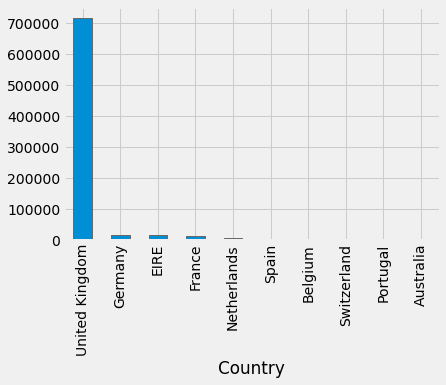

In [59]:
df_year_2009_2011_clean.groupby('Country')['Customer ID'].count().sort_values(ascending = False)[:10].plot(kind = 'bar')

- <font color='darkgreen'>United kingdom stands out in terms of number of products ordered,number of customers and revenue 
    generated</font>
    
- <font color='darkgreen'>Genrmany comes 2nd in customers count but 6th in quanties ordered and 4rth in revenue generated</font>

#### <font color='blue'>90.26% customers are based in UK but i will consider top 5 countries in order of revene generated .This CLV analysis is based on revenue mostly as customer acquisition cost has not been provided</font> 
 

In [60]:
#Take backup
df_year_2009_2011_bkp=df_year_2009_2011_clean.copy(deep=True)

###### <font color='blue'>Let's understand the customer's two years transactions pattern for top 5 countries. </font>

5


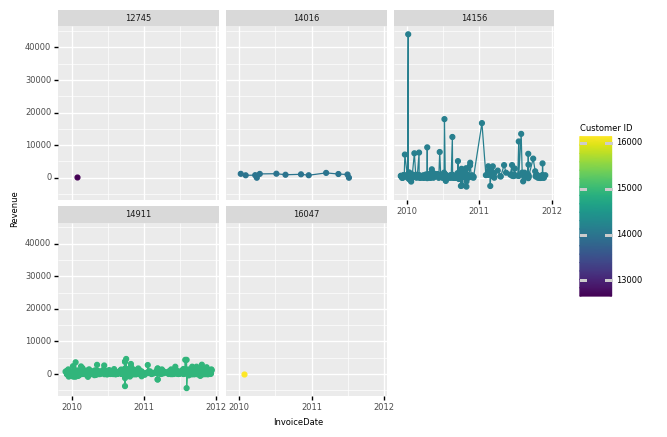

<ggplot: (138490728644)>

In [61]:
cnt=df_year_2009_2011_clean[df_year_2009_2011_clean['Country']=='EIRE']

ids=cnt['Customer ID'].unique()
print(len(ids))
ids_sel=ids#[0:10]
cnt_subset=cnt[cnt["Customer ID"].isin(ids_sel)].groupby(["Customer ID","InvoiceDate"]).sum().reset_index()
cnt_subset.head()



ggplot(aes("InvoiceDate","Revenue" , group="Customer ID",color='Customer ID'),data= cnt_subset) +  geom_line() + \
geom_point() + theme(text=element_text(size=6)) +facet_wrap("Customer ID") + \
scale_x_date( date_breaks ="1 year",date_labels ="%Y" )

95


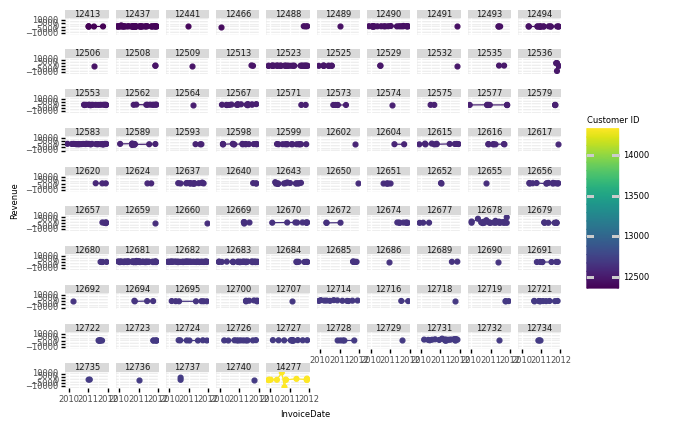

<ggplot: (138490895818)>

In [62]:
cnt=df_year_2009_2011_clean[df_year_2009_2011_clean['Country']=='France']

ids=cnt['Customer ID'].unique()
print(len(ids))
ids_sel=ids#[0:10]
cnt_subset=cnt[cnt["Customer ID"].isin(ids_sel)].groupby(["Customer ID","InvoiceDate"]).sum().reset_index()
cnt_subset.head()



ggplot(aes("InvoiceDate","Revenue" , group="Customer ID",color='Customer ID'),data= cnt_subset) +  geom_line() + \
geom_point() + theme(text=element_text(size=6)) +facet_wrap("Customer ID") + \
scale_x_date( date_breaks ="1 year",date_labels ="%Y" )

23


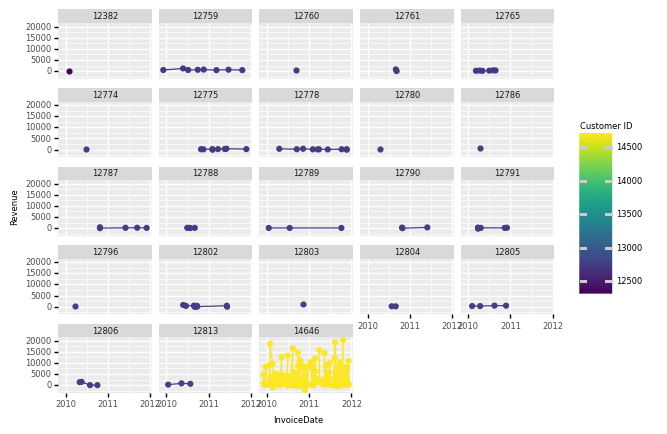

<ggplot: (138506416556)>

In [63]:
cnt=df_year_2009_2011_clean[df_year_2009_2011_clean['Country']=='Netherlands']

ids=cnt['Customer ID'].unique()
print(len(ids))
ids_sel=ids#[0:10]
cnt_subset=cnt[cnt["Customer ID"].isin(ids_sel)].groupby(["Customer ID","InvoiceDate"]).sum().reset_index()
cnt_subset.head()



ggplot(aes("InvoiceDate","Revenue" , group="Customer ID",color='Customer ID'),data= cnt_subset) +  geom_line() + \
geom_point() + theme(text=element_text(size=6)) +facet_wrap("Customer ID") + \
scale_x_date( date_breaks ="1 year",date_labels ="%Y" )

107


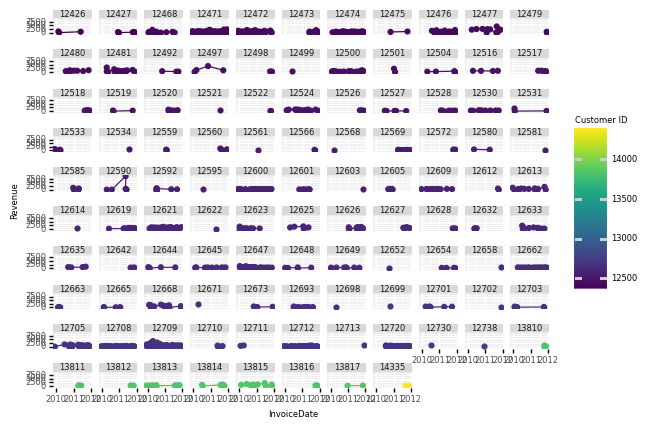

<ggplot: (138507078828)>

In [64]:
cnt=df_year_2009_2011_clean[df_year_2009_2011_clean['Country']=='Germany']

ids=cnt['Customer ID'].unique()
print(len(ids))
ids_sel=ids#[0:10]
cnt_subset=cnt[cnt["Customer ID"].isin(ids_sel)].groupby(["Customer ID","InvoiceDate"]).sum().reset_index()
cnt_subset.head()



ggplot(aes("InvoiceDate","Revenue" , group="Customer ID",color='Customer ID'),data= cnt_subset) +  geom_line() + \
geom_point() + theme(text=element_text(size=6)) +facet_wrap("Customer ID") + \
scale_x_date( date_breaks ="1 year",date_labels ="%Y" )

5410


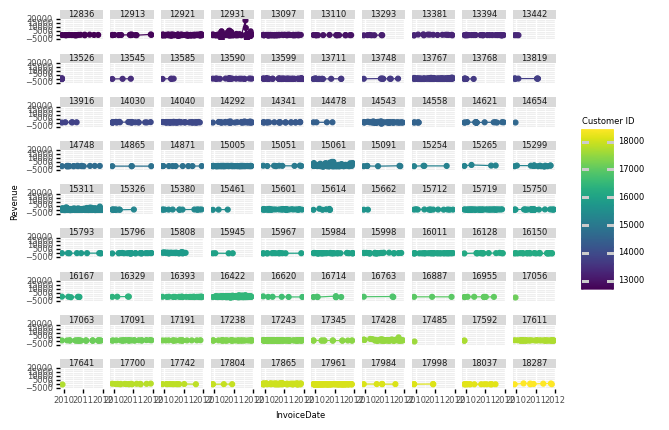

<ggplot: (138511357690)>

In [65]:
cnt=df_year_2009_2011_clean[df_year_2009_2011_clean['Country']=='United Kingdom']

ids=cnt['Customer ID'].unique()
print(len(ids))
ids_sel=ids[10:100]
cnt_subset=cnt[cnt["Customer ID"].isin(ids_sel)].groupby(["Customer ID","InvoiceDate"]).sum().reset_index()
cnt_subset.head()



ggplot(aes("InvoiceDate","Revenue" , group="Customer ID",color='Customer ID'),data= cnt_subset) +  geom_line() + \
geom_point() + theme(text=element_text(size=6)) +facet_wrap("Customer ID") + \
scale_x_date( date_breaks ="1 year",date_labels ="%Y" )

<font color='blue'>Each of the contries have atleast few customers who suppose to have regular transactions, hence considering them all for further analysis</font>

In [66]:
sel_country=['EIRE','France','Netherlands','Germany','United Kingdom']#['EIRE','France','Netherlands','Germany','United Kingdom']
df_year_2009_2011_clean=df_year_2009_2011_clean[df_year_2009_2011_clean['Country'].isin(sel_country)]

- <font color='blue'>For this study i am considering only 5 countries 'EIRE','France','Netherlands','Germany','United Kingdom' </font>

In [67]:
df_year_2009_2011_clean.count()

Invoice        768502
StockCode      768502
Description    768502
Quantity       768502
InvoiceDate    768502
Price          768502
Customer ID    768502
Country        768502
Revenue        768502
dtype: int64

###### <font color='blue'> Study the shopping pattern of random 20 customers </font>

In [68]:
ids=df_year_2009_2011_clean['Customer ID'].unique()
ids_sel=ids[50:70]
df_year_2009_2011_clean_subset=df_year_2009_2011_clean[df_year_2009_2011_clean["Customer ID"].isin(ids_sel)].groupby(["Customer ID","InvoiceDate"]).sum().reset_index()
df_year_2009_2011_clean_subset.head()

Customer ID         InvoiceDate  Quantity  Price  Revenue
0  12490       2009-12-01 12:52:00  442       60.66  603.94 
1  12490       2010-01-31 13:05:00  304       45.91  320.26 
2  12490       2010-02-04 15:33:00  1         51.00  51.00  
3  12490       2010-02-09 11:37:00  436       80.67  534.26 
4  12490       2010-02-22 17:03:00 -4         1.25  -5.00

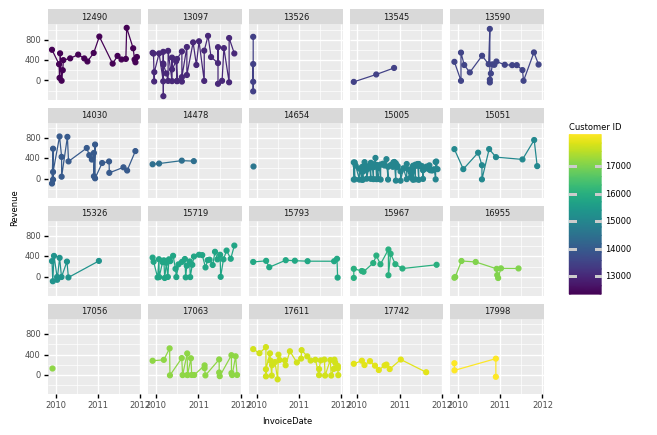

<ggplot: (138435169573)>

In [69]:
ggplot(aes("InvoiceDate","Revenue" , group="Customer ID",color='Customer ID'),data= df_year_2009_2011_clean_subset) +  geom_line() + \
geom_point() + theme(text=element_text(size=6)) +facet_wrap("Customer ID") + \
scale_x_date( date_breaks ="1 year",date_labels ="%Y" )

- <font color='darkgreen'>Random 20 customers transaction shows that most customers stay live. few customers such as 17056 have not done few transactions and stopped hwerese  </font>

######  

##### <font color='blue'>Let's try to understand the price,revenue and quantity periodically </font>

In [70]:
#Date Time Analysis
df_year_2009_2011_clean.loc[:, "Month"] = df_year_2009_2011_clean.InvoiceDate.dt.month
df_year_2009_2011_clean.loc[:, "Time"] = df_year_2009_2011_clean.InvoiceDate.dt.time
df_year_2009_2011_clean.loc[:, "Year"] = df_year_2009_2011_clean.InvoiceDate.dt.year
df_year_2009_2011_clean.loc[:, "Day"] = df_year_2009_2011_clean.InvoiceDate.dt.day
df_year_2009_2011_clean.loc[:, "Quarter"] = df_year_2009_2011_clean.InvoiceDate.dt.quarter
df_year_2009_2011_clean.loc[:, "Week_Day"] = df_year_2009_2011_clean.InvoiceDate.dt.dayofweek

In [71]:
df_year_2009_2011_clean.head(5)

Invoice StockCode                          Description  Quantity  \
0  489434  85048     15CM CHRISTMAS GLASS BALL 20 LIGHTS  12         
1  489434  79323P    PINK CHERRY LIGHTS                   12         
2  489434  79323W     WHITE CHERRY LIGHTS                 12         
3  489434  22041     RECORD FRAME 7" SINGLE SIZE          48         
4  489434  21232     STRAWBERRY CERAMIC TRINKET BOX       24         

          InvoiceDate  Price  Customer ID         Country  Revenue  Month  \
0 2009-12-01 07:45:00  6.95   13085        United Kingdom  83.4     12      
1 2009-12-01 07:45:00  6.75   13085        United Kingdom  81.0     12      
2 2009-12-01 07:45:00  6.75   13085        United Kingdom  81.0     12      
3 2009-12-01 07:45:00  2.10   13085        United Kingdom  100.8    12      
4 2009-12-01 07:45:00  1.25   13085        United Kingdom  30.0     12      

       Time  Year  Day  Quarter  Week_Day  
0  07:45:00  2009  1    4        1         
1  07:45:00  2009  1    4        1         
2  07:45:00  2009  1    4        1         
3  07:45:00  2009  1    4        1         
4  07:45:00  2009  1    4        1

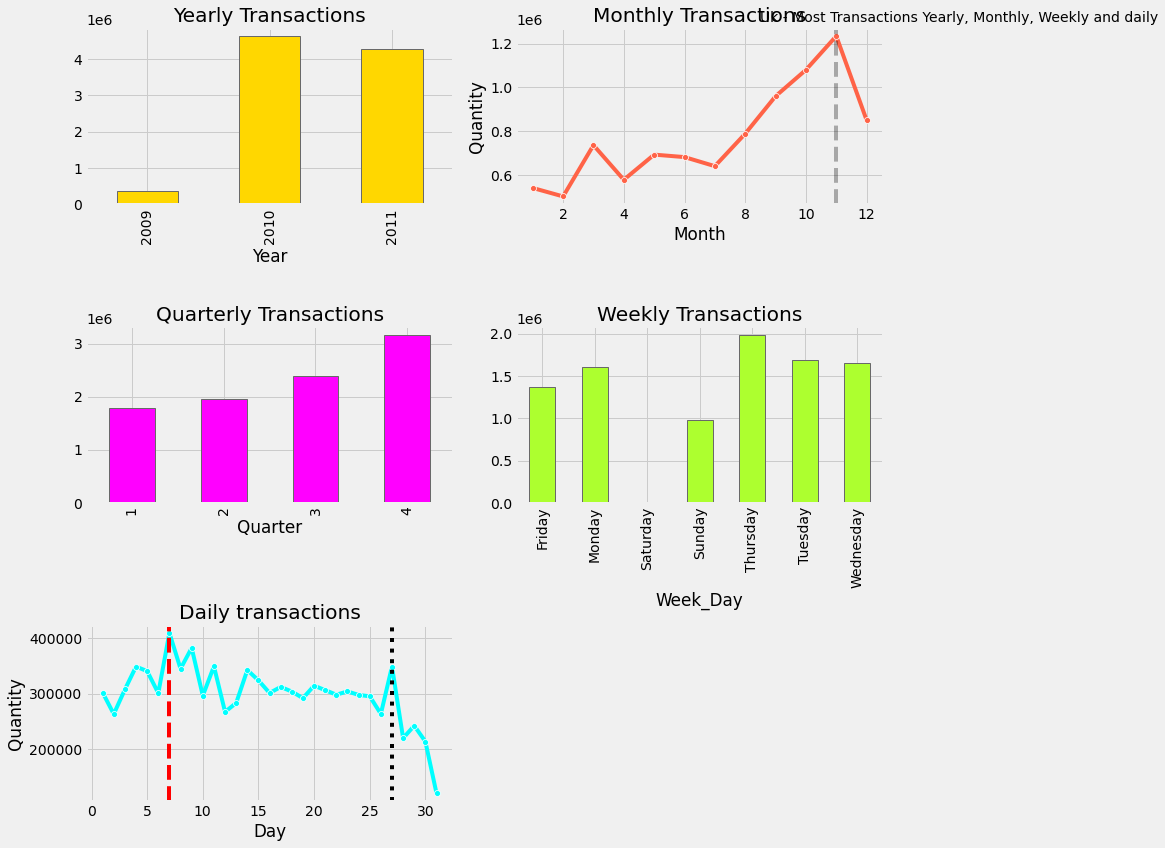

In [72]:
#Mapping day of week
Week_Day = dict({0: "Monday", 
                         1: "Tuesday", 
                         2: "Wednesday" , 
                         3: "Thursday", 
                         4: "Friday", 
                         5: "Saturday", 
                         6: "Sunday"})

df_year_2009_2011_clean["Week_Day"] = df_year_2009_2011_clean["Week_Day"].map(Week_Day)

plt.figure(figsize=(16,12))
plt.subplot(3,2,1)
df_year_2009_2011_clean.groupby("Year").sum()["Quantity"].plot(kind = "bar", color = "gold")
plt.title("Yearly Transactions")



plt.subplot(3,2,2)
sns.lineplot(x = "Month", y = "Quantity", data = df_year_2009_2011_clean.groupby("Month").sum("Quantity"), marker = "o", color = "tomato")
plt.axvline(11, color = "k", linestyle = '--', alpha = 0.3)
plt.text(8.50, 1.3e6, "Uk - Most Transactions Yearly, Monthly, Weekly and daily")
plt.title("Monthly Transactions")

plt.subplot(3,2,3)
df_year_2009_2011_clean.groupby("Quarter").sum()["Quantity"].plot(kind = "bar", color = "fuchsia")
plt.title("Quarterly Transactions")

plt.subplot(3,2,4)
df_year_2009_2011_clean.groupby("Week_Day").sum()["Quantity"].plot(kind = "bar", color = "greenyellow")
plt.title("Weekly Transactions")



plt.subplot(3,2,5)

sns.lineplot(x = "Day", y = "Quantity", data = df_year_2009_2011_clean.groupby("Day").sum("Quantity"), marker = "o",  color = 'cyan')
plt.axvline(7, color = 'r', linestyle = '--')
plt.axvline(27, color = 'k', linestyle = "dotted")
plt.title("Daily transactions")

plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Description'>

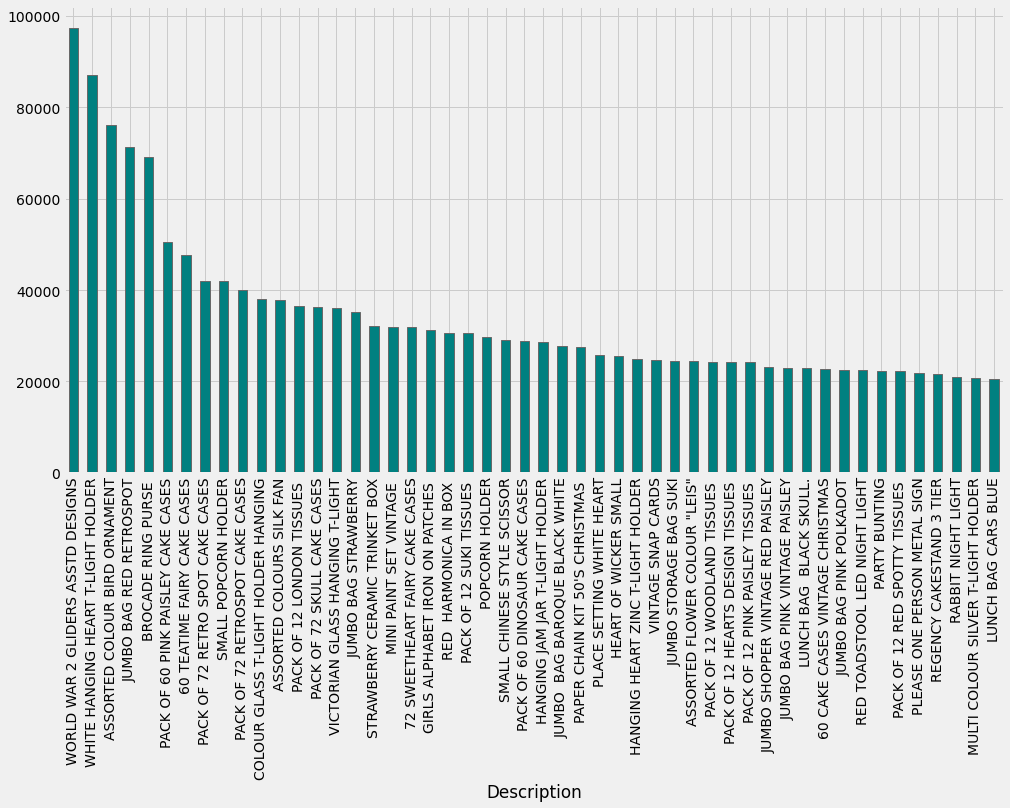

In [73]:
plt.figure(figsize=(15,8))
df_year_2009_2011_clean.groupby("Description").sum().sort_values(by = "Quantity", ascending = False).head(50)["Quantity"].plot(kind = "bar", color = 'teal')

<AxesSubplot:xlabel='Description'>

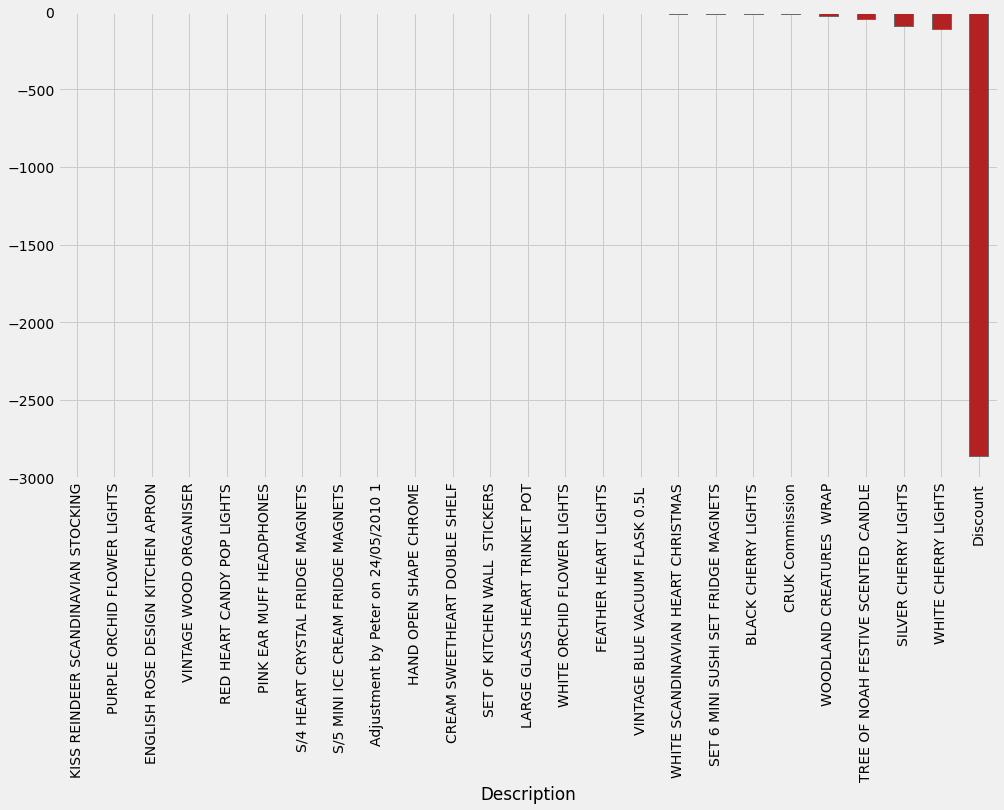

In [74]:
plt.figure(figsize=(15,8))
df_year_2009_2011_clean.groupby("Description").sum().sort_values(by = "Quantity", ascending = False).tail(25)["Quantity"].plot(kind = "bar", color = 'firebrick')

<AxesSubplot:xlabel='Description'>

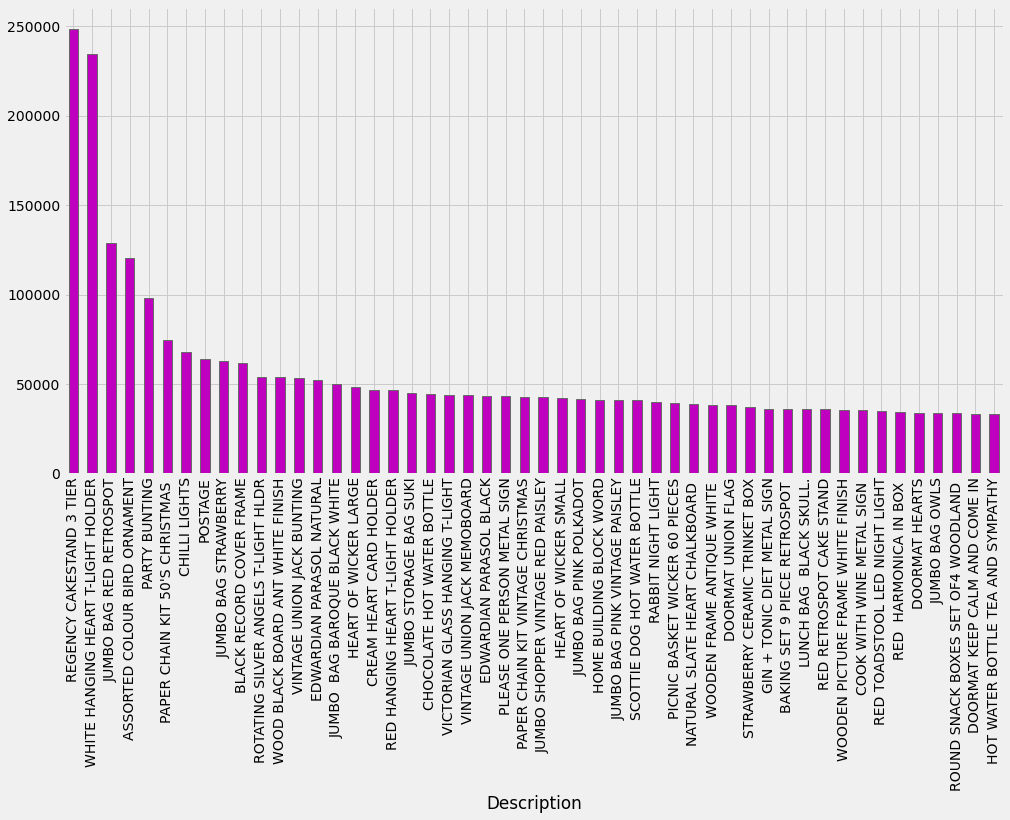

In [75]:
plt.figure(figsize=(15,8))
df_year_2009_2011_clean.groupby("Description").sum().sort_values(by = "Revenue", ascending = False).head(50)["Revenue"].plot(kind = "bar", color = 'm')

<AxesSubplot:xlabel='Description'>

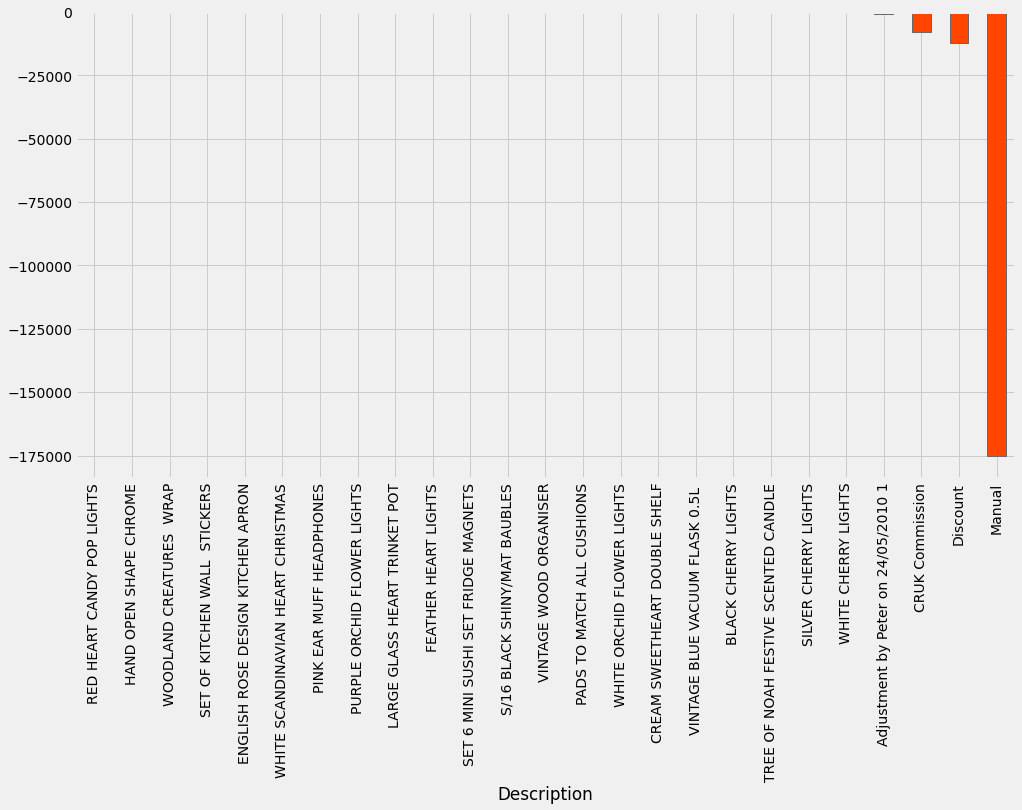

In [76]:
plt.figure(figsize=(15,8))
df_year_2009_2011_clean.groupby("Description").sum().sort_values(by = "Revenue", ascending = False).tail(25)["Revenue"].plot(kind = "bar", color = 'orangered')

In [77]:
df_year_2009_2011_clean.groupby("Description").sum().sort_values(by = "Quantity", ascending = False).tail(5)

Quantity     Price  Customer ID  \
Description                                                            
WOODLAND CREATURES  WRAP            -25        0.42      12613         
TREE OF NOAH FESTIVE SCENTED CANDLE -46        7.30      143933        
SILVER CHERRY LIGHTS                -93        193.40    486388        
WHITE CHERRY LIGHTS                 -109       1373.60   3359406       
Discount                            -2862      11738.30  2511366       

                                      Revenue  Month    Year   Day  Quarter  
Description                                                                  
WOODLAND CREATURES  WRAP            -10.50     1      2010    15    1        
TREE OF NOAH FESTIVE SCENTED CANDLE -169.10    108    18081   113   36       
SILVER CHERRY LIGHTS                -597.85    143    60300   549   56       
WHITE CHERRY LIGHTS                 -637.05    973    434161  3460  373      
Discount                            -12325.33  1278   335732  2810  477

###### Relation between Customers and products

In [78]:
pd.DataFrame([{'products': len(df_year_2009_2011_clean['StockCode'].value_counts()),    
               'transactions': len(df_year_2009_2011_clean['Invoice'].value_counts()),
               'customers': len(df_year_2009_2011_clean['Customer ID'].value_counts()),  
              }], columns = ['products', 'transactions', 'customers'], index = ['quantity'])

products  transactions  customers
quantity  4642      43315         5638

###### 5400 customers purchased 4563 products in 37286 transaction in the span of two years.

###### Determine the number of products purchased by customer in each transaction

In [79]:
temp = df_year_2009_2011_clean.groupby(by=['Customer ID', 'Invoice'], as_index=False)['InvoiceDate'].count()
nb_products_per_basket = temp.rename(columns = {'InvoiceDate':'Number of Orders'})
nb_products_per_basket[:20].sort_values('Customer ID')

Customer ID  Invoice  Number of Orders
0   12346        491725   1               
16  12346        C541433  1               
15  12346        C525274  1               
14  12346        C525099  1               
13  12346        C514024  9               
12  12346        C495800  1               
11  12346        541431   1               
10  12346        513774   19              
9   12346        499763   5               
7   12346        494450   1               
6   12346        493412   1               
5   12346        493410   1               
4   12346        492722   1               
3   12346        492718   1               
2   12346        491744   1               
1   12346        491742   1               
8   12346        495295   1               
17  12382        C495743  1               
18  12413        540365   24              
19  12413        550338   4

Following can be observed from the result
- Invoice number contains prefix C for some of the transaction , this is considered as cancelled transaction
- There are few customers who only purchased one product 
- There are few customers who buy a large number of items at each order

###### Exploring more on cancelled orders

In [80]:
nb_products_per_basket['order_canceled'] = nb_products_per_basket['Invoice'].astype(str).apply(lambda x:int('C' in x))
display(nb_products_per_basket[:20])

Customer ID  Invoice  Number of Orders  order_canceled
0   12346        491725   1                 0             
1   12346        491742   1                 0             
2   12346        491744   1                 0             
3   12346        492718   1                 0             
4   12346        492722   1                 0             
5   12346        493410   1                 0             
6   12346        493412   1                 0             
7   12346        494450   1                 0             
8   12346        495295   1                 0             
9   12346        499763   5                 0             
10  12346        513774   19                0             
11  12346        541431   1                 0             
12  12346        C495800  1                 1             
13  12346        C514024  9                 1             
14  12346        C525099  1                 1             
15  12346        C525274  1                 1             
16  12346        C541433  1                 1             
17  12382        C495743  1                 1             
18  12413        540365   24                0             
19  12413        550338   4                 0

In [81]:
n1 = nb_products_per_basket['order_canceled'].sum()
n2 = nb_products_per_basket.shape[0]
print('Number of orders canceled: {}/{} ({:.2f}%) '.format(n1, n2, n1/n2*100))

Number of orders canceled: 7570/43315 (17.48%) 


#### <font color='blue'> Percentage of cancellations is quite large ( ∼ 17 % of the total number of transactions). 

In [82]:
list_special_codes = df_year_2009_2011_clean[df_year_2009_2011_clean['StockCode'].str.contains('^[a-zA-Z]+', regex=True, na=False)]['StockCode'].unique()
list_special_codes

array(['POST', 'D', 'M', 'C2', 'BANK CHARGES', 'TEST001', 'TEST002',
       'PADS', 'ADJUST', 'ADJUST2', 'SP1002', 'DOT', 'CRUK'], dtype=object)

In [83]:
for code in list_special_codes:
    print("{:<15} -> {:<30}".format(code, df_year_2009_2011_clean[df_year_2009_2011_clean['StockCode'] == code]['Description'].unique()[0]))

POST            -> POSTAGE                       
D               -> Discount                      
M               -> Manual                        
C2              -> CARRIAGE                      
BANK CHARGES    ->  Bank Charges                 
TEST001         -> This is a test product.       
TEST002         -> This is a test product.       
PADS            -> PADS TO MATCH ALL CUSHIONS    
ADJUST          -> Adjustment by john on 26/01/2010 16
ADJUST2         -> Adjustment by Peter on Jun 25 2010 
SP1002          -> KID'S CHALKBOARD/EASEL        
DOT             -> DOTCOM POSTAGE                
CRUK            -> CRUK Commission               


##### Till now we have observed that  most important atributes are , hence they should be as normalised as possible
- Quantity
- Unit Price
- Invoice Date
- Unique customer Id 

In [84]:
df_year_2009_2011_clean['BillingMonthYear']= df_year_2009_2011_clean['InvoiceDate'].map(lambda date:100*date.year + date.month)

###### Group values for visualisation

In [85]:
df_revenue=df_year_2009_2011_clean.groupby(['BillingMonthYear'])['Revenue'].sum().reset_index()
df_revenue.head(5)

BillingMonthYear     Revenue
0  200912            637472.530
1  201001            506739.882
2  201002            453997.206
3  201003            617307.761
4  201004            528129.232

<AxesSubplot:xlabel='BillingMonthYear'>

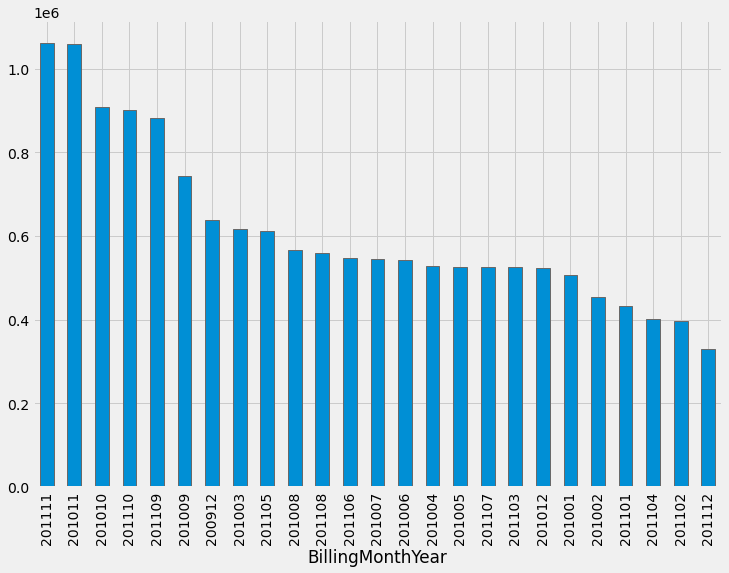

In [86]:
plt.figure(figsize=(11,8))
df_year_2009_2011_clean.groupby(['BillingMonthYear'])['Revenue'].sum().sort_values(ascending = False).plot(kind = 'bar')

#### <font color='blue'> Maximum revenue generated during the last 4 months of the year (Sep,Oct,Nov,Dec)</font>

In [87]:
#X and Y axis inputs for Plotly graph. We use Scatter for line graphs


plot_data = [go.Scatter(x=df_revenue['BillingMonthYear'],y=df_revenue['Revenue'] )]
plot_layout = go.Layout(xaxis={"type": "category"},title='Montly Revenue' )

fig = go.Figure(data=plot_data, layout=plot_layout)

pyoff.iplot(fig)

#### Monthly growth rate

In [88]:
#using pct_change() function to see monthly percentage change
df_revenue['MonthlyGrowth'] = df_revenue['Revenue'].pct_change()

#showing first 5 rows
df_revenue.head(5)

    

BillingMonthYear     Revenue  MonthlyGrowth
0  200912            637472.530 NaN           
1  201001            506739.882 -0.205080     
2  201002            453997.206 -0.104082     
3  201003            617307.761  0.359717     
4  201004            528129.232 -0.144464

In [89]:
#visualization - line graph
plot_data = [
    go.Scatter(
        x=df_revenue.query("BillingMonthYear < 201112")['BillingMonthYear'],
        y=df_revenue.query("BillingMonthYear < 201112")['MonthlyGrowth'],
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Monthly Growth Rate'
    )

fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [90]:
df_revenue[df_revenue["MonthlyGrowth"]< 0].sort_values("MonthlyGrowth")

BillingMonthYear     Revenue  MonthlyGrowth
24  201112            330529.440 -0.688742     
12  201012            522388.080 -0.506951     
16  201104            402624.871 -0.232954     
1   201001            506739.882 -0.205080     
13  201101            432875.980 -0.171352     
4   201004            528129.232 -0.144464     
18  201106            546827.940 -0.107239     
2   201002            453997.206 -0.104082     
14  201102            395733.730 -0.085803     
19  201107            526542.711 -0.037096     
5   201005            526653.160 -0.002795

#### <font color='blue'> Checking why the monthly growth is minimum in dec 2010</font>

In [91]:
data_201012=df_year_2009_2011_clean[df_year_2009_2011_clean["BillingMonthYear"]== 201012] 
data_201012.head()

Invoice StockCode                          Description  Quantity  \
502938  536365  85123A    WHITE HANGING HEART T-LIGHT HOLDER   6          
502939  536365  71053     WHITE METAL LANTERN                  6          
502940  536365  84406B    CREAM CUPID HEARTS COAT HANGER       8          
502941  536365  84029G    KNITTED UNION FLAG HOT WATER BOTTLE  6          
502942  536365  84029E    RED WOOLLY HOTTIE WHITE HEART.       6          

               InvoiceDate  Price  Customer ID         Country  Revenue  \
502938 2010-12-01 08:26:00  2.55   17850        United Kingdom  15.30     
502939 2010-12-01 08:26:00  3.39   17850        United Kingdom  20.34     
502940 2010-12-01 08:26:00  2.75   17850        United Kingdom  22.00     
502941 2010-12-01 08:26:00  3.39   17850        United Kingdom  20.34     
502942 2010-12-01 08:26:00  3.39   17850        United Kingdom  20.34     

        Month      Time  Year  Day  Quarter   Week_Day  BillingMonthYear  
502938  12     08:26:00  2010  1    4        Wednesday  201012            
502939  12     08:26:00  2010  1    4        Wednesday  201012            
502940  12     08:26:00  2010  1    4        Wednesday  201012            
502941  12     08:26:00  2010  1    4        Wednesday  201012            
502942  12     08:26:00  2010  1    4        Wednesday  201012

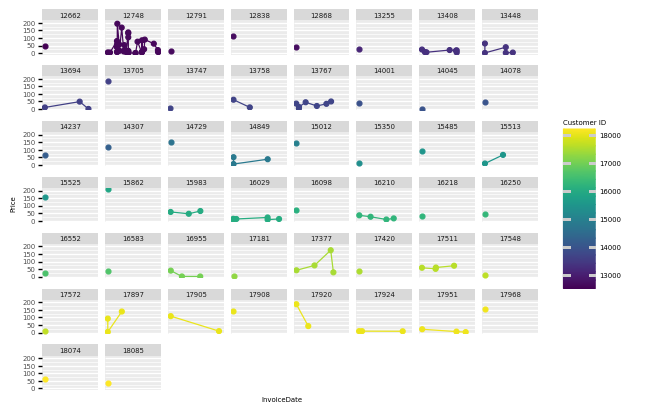

<ggplot: (138506468545)>

In [92]:
ids=data_201012['Customer ID'].unique()
ids_sel=ids[10:60]
df_year_2009_2011_clean_subset=data_201012[data_201012["Customer ID"].isin(ids_sel)].groupby(["Customer ID","InvoiceDate"]).sum().reset_index()
df_year_2009_2011_clean_subset.head()

ggplot(aes("InvoiceDate","Price" , group="Customer ID",color='Customer ID'),data= df_year_2009_2011_clean_subset) +  geom_line() + \
geom_point() + theme(text=element_text(size=5)) +facet_wrap("Customer ID") + \
scale_x_date( date_breaks ="1 year",date_labels ="%Y" )

In [93]:
plot_data = [go.Scatter(x=data_201012['InvoiceDate'],y=data_201012['Revenue'] )]

plot_layout = go.Layout(xaxis={"type": "category"},title='Montly Revenue' )

fig = go.Figure(data=plot_data, layout=plot_layout)

pyoff.iplot(fig)




In [94]:
data_201012_test=data_201012[data_201012['Revenue'] <=0] 

plot_data = [go.Scatter(x=data_201012_test['InvoiceDate'],y=data_201012_test['Revenue']  )]

plot_layout = go.Layout(xaxis={"type": "category"},title='Montly Revenue less than 0' )

fig = go.Figure(data=plot_data, layout=plot_layout)

pyoff.iplot(fig)


#### <font color='blue'> Looking to the above three charts it seems that the growth rate reduced because most of the customers did not transacted in this month or order cancellation, but we can also see the peak</font>

#### Monthly Active Customers

In [95]:
from __future__ import division

import matplotlib.pyplot as plt
from matplotlib import colors as mcolors


colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

# Sort colors by hue, saturation, value and name.
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())
sorted_names = [name for hsv, name in by_hsv]
 
col_lst=[]
for i, name in enumerate(sorted_names):
 
    if len(name) > 3: 
        col_lst.append(name)

 

In [96]:
df_year_2009_2011_clean_active_monthly= df_year_2009_2011_clean.groupby('BillingMonthYear')['Customer ID'].nunique().reset_index()

In [97]:
df_year_2009_2011_clean_active_monthly.head(5)

BillingMonthYear  Customer ID
0  200912            1014       
1  201001            754        
2  201002            783        
3  201003            1073       
4  201004            968

In [98]:
#plotting the output
z=col_lst[80:]#[12,24,48]
plot_data = [go.Bar( x=df_year_2009_2011_clean_active_monthly['BillingMonthYear'],y=df_year_2009_2011_clean_active_monthly['Customer ID'],marker=dict(color = z,colorscale='viridis'))]
plot_layout = go.Layout(xaxis={"type": "category"},title='Monthly Active Customers')

fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

#### Monthly Order Count

In [99]:
df_monthly_sales=df_year_2009_2011_clean.groupby('BillingMonthYear')['Quantity'].sum().reset_index()
df_monthly_sales.head(5)

BillingMonthYear  Quantity
0  200912            379011  
1  201001            295313  
2  201002            261195  
3  201003            424603  
4  201004            317381

In [100]:
#plot

z=col_lst[100:]#[12,24,48]
plot_data = [go.Bar(x=df_monthly_sales['BillingMonthYear'],y=df_monthly_sales['Quantity'],marker=dict(color = z,colorscale='viridis'))]

plot_layout = go.Layout(xaxis={"type": "category"},title='Monthly Total Numbers Of Order')

fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)
 

#### Average Revenue per Order

In [101]:
# create a new dataframe for average revenue by taking the mean of it
df_monthly_order_avg = df_year_2009_2011_clean.groupby('BillingMonthYear')['Revenue'].mean().reset_index()
df_monthly_order_avg.head(5)

BillingMonthYear    Revenue
0  200912            20.958460
1  201001            23.576973
2  201002            19.765650
3  201003            19.347095
4  201004            19.793465

In [102]:
#plot the bar chart
z=col_lst[50:]#[12,24,48]
plot_data = [go.Bar(x=df_monthly_order_avg['BillingMonthYear'],y=df_monthly_order_avg['Revenue'],marker=dict(color = z,colorscale='viridis'))]
plot_layout = go.Layout(xaxis={"type": "category"},title='Monthly Average (Mean) Order')
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

#### New customer ratio - Customers who shop during defined timelines

In [103]:
df_min_purchase = df_year_2009_2011_clean.groupby('Customer ID').InvoiceDate.min().reset_index()
df_min_purchase.columns = ['Customer ID','MinPurchaseDate']
df_min_purchase['MinPurchaseYearMonth'] = df_min_purchase['MinPurchaseDate'].map(lambda date: 100*date.year + date.month)
df_min_purchase.head(5)

Customer ID     MinPurchaseDate  MinPurchaseYearMonth
0  12346       2009-12-14 08:34:00  200912              
1  12382       2010-01-26 16:25:00  201001              
2  12413       2011-01-06 16:12:00  201101              
3  12426       2010-02-15 08:41:00  201002              
4  12427       2010-12-03 10:44:00  201012

In [104]:
df_year_2009_2011_clean.count()

Invoice             768502
StockCode           768502
Description         768502
Quantity            768502
InvoiceDate         768502
Price               768502
Customer ID         768502
Country             768502
Revenue             768502
Month               768502
Time                768502
Year                768502
Day                 768502
Quarter             768502
Week_Day            768502
BillingMonthYear    768502
dtype: int64

#### <font color='blue'> Calculate the new and existing customers </font>

In [105]:
df_merge=df_year_2009_2011_clean.copy()
#df_uk_cpy=df_uk.copy()

In [106]:
#merge first purchase date column to our main dataframe (tx_uk)
df_merge = pd.merge(df_year_2009_2011_clean, df_min_purchase, on='Customer ID')


In [107]:
df_merge['UserType'] = 'New'

In [108]:
df_merge.loc[df_merge['BillingMonthYear']>df_merge['MinPurchaseYearMonth'],'UserType'] = 'Existing'

In [109]:
df_merge.head(10)
#df_uk_cpy.to_excel("output.xlsx",sheet_name='Sheet_name_1')  

Invoice StockCode                          Description  Quantity  \
0  489434  85048     15CM CHRISTMAS GLASS BALL 20 LIGHTS  12         
1  489434  79323P    PINK CHERRY LIGHTS                   12         
2  489434  79323W     WHITE CHERRY LIGHTS                 12         
3  489434  22041     RECORD FRAME 7" SINGLE SIZE          48         
4  489434  21232     STRAWBERRY CERAMIC TRINKET BOX       24         
5  489434  22064     PINK DOUGHNUT TRINKET POT            24         
6  489434  21871     SAVE THE PLANET MUG                  24         
7  489434  21523     FANCY FONT HOME SWEET HOME DOORMAT   10         
8  489435  22350     CAT BOWL                             12         
9  489435  22349     DOG BOWL , CHASING BALL DESIGN       12         

          InvoiceDate  Price  Customer ID         Country  Revenue  Month  \
0 2009-12-01 07:45:00  6.95   13085        United Kingdom  83.4     12      
1 2009-12-01 07:45:00  6.75   13085        United Kingdom  81.0     12      
2 2009-12-01 07:45:00  6.75   13085        United Kingdom  81.0     12      
3 2009-12-01 07:45:00  2.10   13085        United Kingdom  100.8    12      
4 2009-12-01 07:45:00  1.25   13085        United Kingdom  30.0     12      
5 2009-12-01 07:45:00  1.65   13085        United Kingdom  39.6     12      
6 2009-12-01 07:45:00  1.25   13085        United Kingdom  30.0     12      
7 2009-12-01 07:45:00  5.95   13085        United Kingdom  59.5     12      
8 2009-12-01 07:46:00  2.55   13085        United Kingdom  30.6     12      
9 2009-12-01 07:46:00  3.75   13085        United Kingdom  45.0     12      

       Time  Year  Day  Quarter Week_Day  BillingMonthYear  \
0  07:45:00  2009  1    4        Tuesday  200912             
1  07:45:00  2009  1    4        Tuesday  200912             
2  07:45:00  2009  1    4        Tuesday  200912             
3  07:45:00  2009  1    4        Tuesday  200912             
4  07:45:00  2009  1    4        Tuesday  200912             
5  07:45:00  2009  1    4        Tuesday  200912             
6  07:45:00  2009  1    4        Tuesday  200912             
7  07:45:00  2009  1    4        Tuesday  200912             
8  07:46:00  2009  1    4        Tuesday  200912             
9  07:46:00  2009  1    4        Tuesday  200912             

      MinPurchaseDate  MinPurchaseYearMonth UserType  
0 2009-12-01 07:45:00  200912                New      
1 2009-12-01 07:45:00  200912                New      
2 2009-12-01 07:45:00  200912                New      
3 2009-12-01 07:45:00  200912                New      
4 2009-12-01 07:45:00  200912                New      
5 2009-12-01 07:45:00  200912                New      
6 2009-12-01 07:45:00  200912                New      
7 2009-12-01 07:45:00  200912                New      
8 2009-12-01 07:45:00  200912                New      
9 2009-12-01 07:45:00  200912                New

In [110]:
df_user_type_revenue = df_merge.groupby(['BillingMonthYear','UserType'])['Revenue'].sum().reset_index()

In [111]:
#df_user_type_revenue = df_user_type_revenue.query("BillingMonthYear != 201012 and BillingMonthYear != 201112")
df_user_type_revenue = df_user_type_revenue.query( "BillingMonthYear != 200912" )
print("Revenue per month for New and Existing Customer")
df_user_type_revenue.head(5)

Revenue per month for New and Existing Customer


BillingMonthYear  UserType     Revenue
1  201001            Existing  369536.101
2  201001            New       137203.781
3  201002            Existing  310908.003
4  201002            New       143089.203
5  201003            Existing  451093.480

In [112]:
#df_user_type_revenue.to_excel("output.xlsx",sheet_name='Sheet_name_1')  

In [113]:
plot_data = [
    go.Scatter(
        x=df_user_type_revenue.query("UserType == 'Existing'")['BillingMonthYear'],
        y=df_user_type_revenue.query("UserType == 'Existing'")['Revenue'],
        name = 'Existing'
    ),
    go.Scatter(
        x=df_user_type_revenue.query("UserType == 'New'")['BillingMonthYear'],
        y=df_user_type_revenue.query("UserType == 'New'")['Revenue'],
        name = 'New'
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='New vs Existing Customers'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

#### <font color='blue'> Existing customers are showing yearly positive trend and tell us that our customer base is growing but new customers have a slight negative trend. Both Existing and new customers got a peak by eand of year due to Christmas/New Year festive seasons.
Let’s have a better view by looking at the New Customer Ratio:</font>

In [114]:
#create a dataframe that shows new user ratio - we also need to drop NA values (first month new user ratio is 0)
df_user_ratio = df_merge.query("UserType == 'New'").groupby(['BillingMonthYear'])['Customer ID'].\
nunique()/df_merge.query("UserType == 'Existing'").groupby(['BillingMonthYear'])['Customer ID'].nunique() 
df_user_ratio = df_user_ratio.reset_index()
df_user_ratio = df_user_ratio.dropna()

#print the dafaframe
df_user_ratio.head()


BillingMonthYear  Customer ID
1  201001            0.963542   
2  201002            0.800000   
3  201003            0.638168   
4  201004            0.404935   
5  201005            0.305063

In [115]:
z=col_lst[60:]#[12,24,48]
#plot the result

plot_data = [
    go.Bar(
        x=df_user_ratio.query("BillingMonthYear>200912 and BillingMonthYear<201112")['BillingMonthYear'],
        y=df_user_ratio.query("BillingMonthYear>200912 and BillingMonthYear<201112")['Customer ID'],\
        marker=dict(color = z,colorscale='viridis')
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='New Customer Ratio'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

New customer ration is declining 

### Monthly Retention Rate

Retention rate should be monitored very closely because it indicates how sticky is your service and how well your product fits the market. For making Monthly Retention Rate visualized, we need to calculate how many customers retained from previous month.

- [(E-N)/S] x 100 = CRR
Where 
    - The number of existing customers at the start of the time period (S)
    - The number of total customers at the end of the time period (E)
    - The number of new customers added within the time period (N)

- Monthly Retention Rate = Retained Customers From Prev. Month/Active Customers Total
- We will be using crosstab() function of pandas which makes calculating Retention Rate super easy.

In [116]:
#identify which users are active by looking at their revenue per month
df_user_purchase = df_merge.groupby(['Customer ID','BillingMonthYear'])['Revenue'].sum().reset_index()

print("Total Monthly revenue for each customer")
df_user_purchase.head(12)

Total Monthly revenue for each customer


Customer ID  BillingMonthYear  Revenue
0   12346        200912            113.50 
1   12346        201001           -13.50  
2   12346        201003            27.05  
3   12346        201006           -173.29 
4   12346        201010           -5.50   
5   12346        201101            0.00   
6   12382        201001           -18.38  
7   12413        201101            415.30 
8   12413        201104            84.65  
9   12413        201110            194.20 
10  12426        201002            762.48 
11  12426        201003           -33.80

In [117]:
df_year_2009_2011_clean.count()

Invoice             768502
StockCode           768502
Description         768502
Quantity            768502
InvoiceDate         768502
Price               768502
Customer ID         768502
Country             768502
Revenue             768502
Month               768502
Time                768502
Year                768502
Day                 768502
Quarter             768502
Week_Day            768502
BillingMonthYear    768502
dtype: int64

### create retention matrix with crosstab


<font color='blue'>  Retention table shows us which customers are active on each month (1 stands for active).
With the help of a simple for loop, for each month we calculate Retained Customer Count from previous month and Total Customer Count.In the end, we have our Retention Rate dataframe & line chart like below:</font>

In [118]:
df_retention = pd.crosstab(df_user_purchase['Customer ID'], df_user_purchase['BillingMonthYear']).reset_index()

df_retention.head()

BillingMonthYear  Customer ID  200912  201001  201002  201003  201004  201005  \
0                 12346        1       1       0       1       0       0        
1                 12382        0       1       0       0       0       0        
2                 12413        0       0       0       0       0       0        
3                 12426        0       0       1       1       0       0        
4                 12427        0       0       0       0       0       0        

BillingMonthYear  201006  201007  201008  201009  201010  201011  201012  \
0                 1       0       0       0       1       0       0        
1                 0       0       0       0       0       0       0        
2                 0       0       0       0       0       0       0        
3                 0       0       0       0       0       0       0        
4                 0       0       0       0       0       0       1        

BillingMonthYear  201101  201102  201103  201104  201105  201106  201107  \
0                 1       0       0       0       0       0       0        
1                 0       0       0       0       0       0       0        
2                 1       0       0       1       0       0       0        
3                 0       0       0       0       1       0       0        
4                 0       0       0       0       0       0       0        

BillingMonthYear  201108  201109  201110  201111  201112  
0                 0       0       0       0       0       
1                 0       0       0       0       0       
2                 0       0       1       0       0       
3                 0       0       0       0       0       
4                 0       0       1       1       0

In [119]:
#create an array of dictionary which keeps Retained & Total User count for each month
months = df_retention.columns[2:]
retention_array = []
for i in range(len(months)-1):
    retention_data = {}
    selected_month = months[i+1]
    prev_month = months[i]
    retention_data['BillingMonthYear'] = int(selected_month)
    retention_data['TotalUserCount'] = df_retention[selected_month].sum()
    retention_data['RetainedUserCount'] = df_retention[(df_retention[selected_month]>0) & (df_retention[prev_month]>0)][selected_month].sum()
    retention_array.append(retention_data)
    
#convert the array to dataframe and calculate Retention Rate
df_retention = pd.DataFrame(retention_array)
df_retention['RetentionRate'] = df_retention['RetainedUserCount']/df_retention['TotalUserCount']
df_retention

BillingMonthYear  TotalUserCount  RetainedUserCount  RetentionRate
0   201002            783             298                0.380587     
1   201003            1073            355                0.330848     
2   201004            968             426                0.440083     
3   201005            1031            418                0.405432     
4   201006            1059            432                0.407932     
5   201007            959             443                0.461940     
6   201008            934             411                0.440043     
7   201009            1149            422                0.367276     
8   201010            1507            531                0.352356     
9   201011            1613            722                0.447613     
10  201012            912             578                0.633772     
11  201101            742             344                0.463612     
12  201102            756             288                0.380952     
13  201103            972             330                0.339506     
14  201104            857             333                0.388565     
15  201105            1047            390                0.372493     
16  201106            1000            451                0.451000     
17  201107            949             402                0.423604     
18  201108            924             418                0.452381     
19  201109            1251            448                0.358114     
20  201110            1360            536                0.394118     
21  201111            1639            664                0.405125     
22  201112            654             426                0.651376

In [120]:

#plot the retention rate graph
plot_data = [
    go.Scatter(
        x=df_retention.query("BillingMonthYear<201112")['BillingMonthYear'],
        y=df_retention.query("BillingMonthYear<201112")['RetentionRate'],
        name="organic"
    )
    
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Monthly Retention Rate'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

Monthly Retention Rate significantly jumped from June to August and went back to previous levels afterwards in both the years.

<font color='blue'> Cohort Based Retention Rate - There is another way of measuring Retention Rate which allows you to see Retention Rate for each cohort. Cohorts are determined as first purchase year-month of the customers. We will be measuring what percentage of the customers retained after their first purchase in each month. This view will help us to see how recent and old cohorts differ regarding retention rate and if recent changes in customer experience affected new customer’s retention or not.
This will be a bit more complicated than others in terms of coding.</font>

In [121]:
#create our retention table again with crosstab() and add firs purchase year month view
df_retention = pd.crosstab(df_user_purchase['Customer ID'], df_user_purchase['BillingMonthYear']).reset_index()
df_retention = pd.merge(df_retention,df_min_purchase[['Customer ID','MinPurchaseYearMonth']],on='Customer ID')
new_column_names = [ 'm_' + str(column) for column in df_retention.columns[:-1]]
new_column_names.append('MinPurchaseYearMonth')
df_retention.columns = new_column_names

#create the array of Retained users for each cohort monthly
retention_array = []
for i in range(len(months)):
    retention_data = {}
    selected_month = months[i]
    prev_months = months[:i]
    next_months = months[i+1:]
    for prev_month in prev_months:
        retention_data[prev_month] = np.nan
        
    total_user_count = df_retention[df_retention.MinPurchaseYearMonth ==  selected_month].MinPurchaseYearMonth.count()
    retention_data['TotalUserCount'] = total_user_count
    retention_data[selected_month] = 1 
    
    query = "MinPurchaseYearMonth == {}".format(selected_month)
    

    for next_month in next_months:
        new_query = query + " and {} > 0".format(str('m_' + str(next_month)))
        retention_data[next_month] = np.round(df_retention.query(new_query)['m_' + str(next_month)].sum()/total_user_count,2)
    retention_array.append(retention_data)
    
df_retention = pd.DataFrame(retention_array)
df_retention.index = months

#showing new cohort based retention table
df_retention


TotalUserCount  201001  201002  201003  201004  201005  \
BillingMonthYear                                                           
201001            370             1.0     0.23    0.32    0.31    0.28     
201002            348            NaN      1.00    0.30    0.23    0.31     
201003            418            NaN     NaN      1.00    0.22    0.27     
201004            279            NaN     NaN     NaN      1.00    0.23     
201005            241            NaN     NaN     NaN     NaN      1.00     
201006            255            NaN     NaN     NaN     NaN     NaN       
201007            172            NaN     NaN     NaN     NaN     NaN       
201008            149            NaN     NaN     NaN     NaN     NaN       
201009            225            NaN     NaN     NaN     NaN     NaN       
201010            353            NaN     NaN     NaN     NaN     NaN       
201011            308            NaN     NaN     NaN     NaN     NaN       
201012            71             NaN     NaN     NaN     NaN     NaN       
201101            71             NaN     NaN     NaN     NaN     NaN       
201102            112            NaN     NaN     NaN     NaN     NaN       
201103            169            NaN     NaN     NaN     NaN     NaN       
201104            96             NaN     NaN     NaN     NaN     NaN       
201105            103            NaN     NaN     NaN     NaN     NaN       
201106            99             NaN     NaN     NaN     NaN     NaN       
201107            95             NaN     NaN     NaN     NaN     NaN       
201108            95             NaN     NaN     NaN     NaN     NaN       
201109            178            NaN     NaN     NaN     NaN     NaN       
201110            207            NaN     NaN     NaN     NaN     NaN       
201111            187            NaN     NaN     NaN     NaN     NaN       
201112            23             NaN     NaN     NaN     NaN     NaN       

                  201006  201007  201008  201009  201010  201011  201012  \
BillingMonthYear                                                           
201001            0.30    0.27    0.24    0.28    0.34    0.31    0.17     
201002            0.26    0.22    0.22    0.29    0.28    0.29    0.14     
201003            0.24    0.24    0.21    0.25    0.30    0.30    0.12     
201004            0.20    0.17    0.18    0.23    0.27    0.26    0.11     
201005            0.20    0.18    0.20    0.19    0.26    0.23    0.13     
201006            1.00    0.22    0.20    0.21    0.22    0.29    0.13     
201007           NaN      1.00    0.21    0.20    0.29    0.30    0.15     
201008           NaN     NaN      1.00    0.24    0.32    0.32    0.17     
201009           NaN     NaN     NaN      1.00    0.30    0.27    0.14     
201010           NaN     NaN     NaN     NaN      1.00    0.28    0.16     
201011           NaN     NaN     NaN     NaN     NaN      1.00    0.21     
201012           NaN     NaN     NaN     NaN     NaN     NaN      1.00     
201101           NaN     NaN     NaN     NaN     NaN     NaN     NaN       
201102           NaN     NaN     NaN     NaN     NaN     NaN     NaN       
201103           NaN     NaN     NaN     NaN     NaN     NaN     NaN       
201104           NaN     NaN     NaN     NaN     NaN     NaN     NaN       
201105           NaN     NaN     NaN     NaN     NaN     NaN     NaN       
201106           NaN     NaN     NaN     NaN     NaN     NaN     NaN       
201107           NaN     NaN     NaN     NaN     NaN     NaN     NaN       
201108           NaN     NaN     NaN     NaN     NaN     NaN     NaN       
201109           NaN     NaN     NaN     NaN     NaN     NaN     NaN       
201110           NaN     NaN     NaN     NaN     NaN     NaN     NaN       
201111           NaN     NaN     NaN     NaN     NaN     NaN     NaN       
201112           NaN     NaN     NaN     NaN     NaN     NaN     NaN       

                  201101  201102  201103  201104  201105  201106

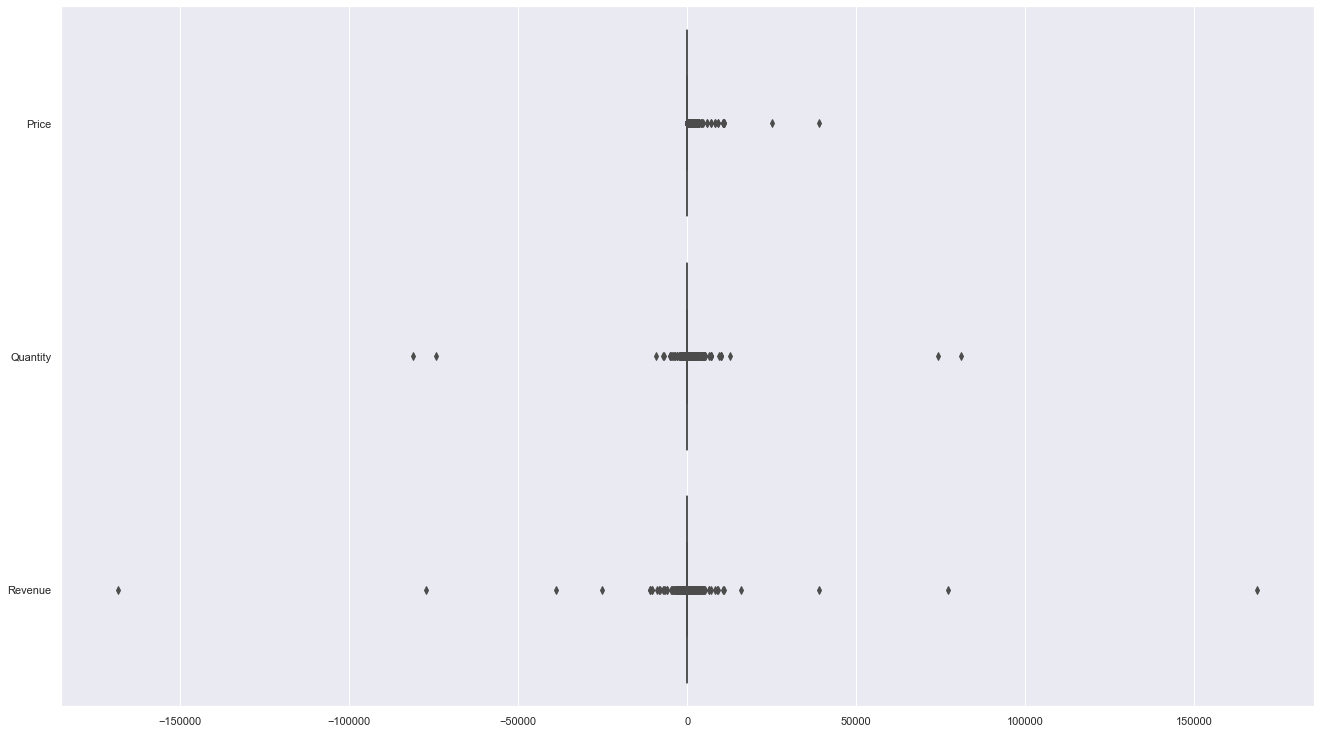

In [122]:
# Plotting BoxPlots for the Bill Amount
sns.set(rc={'figure.figsize':(20,12)})
sns.boxplot(data=df_year_2009_2011_clean[['Price','Quantity','Revenue']], orient="h")
plt.show()

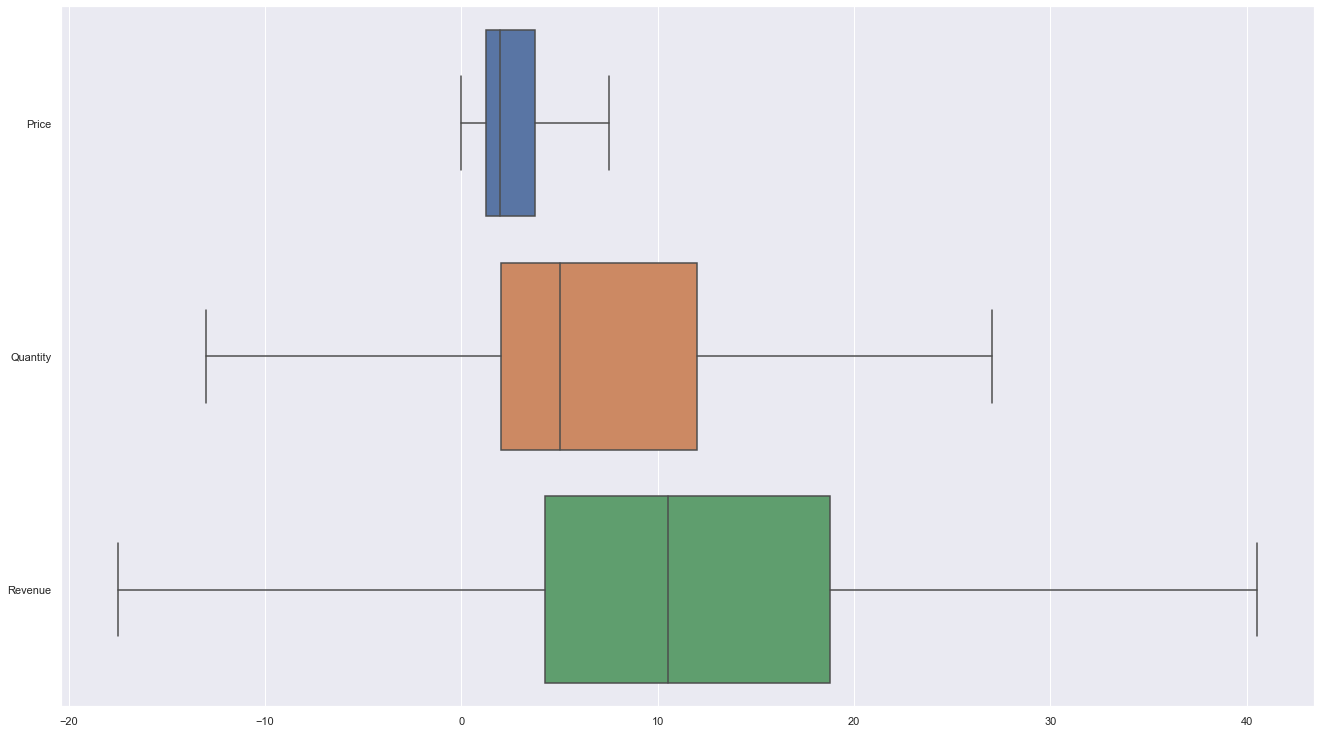

In [123]:
 
sns.set(rc={'figure.figsize':(20,12)})
sns.boxplot(data=df_year_2009_2011_clean[['Price','Quantity','Revenue']], orient="h", showfliers = False)
plt.show()


In [124]:
print("PRICE")
print("{:.2f} % of the transactions made were less than £8.".format(df_year_2009_2011_clean[df_year_2009_2011_clean['Price']<=10].shape[0]/df_year_2009_2011_clean['Price'].shape[0]*100))
print("{:.2f} % of the transactions made were negative.".format(df_year_2009_2011_clean[df_year_2009_2011_clean['Price']<0].shape[0]/df_year_2009_2011_clean['Price'].shape[0]*100))

print("QUANTITY")
print("{:.2f} % of the transactions made with less than 25quantity .".format(df_year_2009_2011_clean[df_year_2009_2011_clean['Quantity']<=25].shape[0]/df_year_2009_2011_clean['Price'].shape[0]*100))
print("{:.2f} % of the transactions made were wtih negative quantity.".format(df_year_2009_2011_clean[df_year_2009_2011_clean['Quantity']<0].shape[0]/df_year_2009_2011_clean['Price'].shape[0]*100))


PRICE
97.02 % of the transactions made were less than £8.
0.00 % of the transactions made were negative.
QUANTITY
93.75 % of the transactions made with less than 25quantity .
2.27 % of the transactions made were wtih negative quantity.


<font color='blue'>The Quantity is skewed due to negative quantities</font>

In [125]:
df_year_2009_2011_clean.head()

Invoice StockCode                          Description  Quantity  \
0  489434  85048     15CM CHRISTMAS GLASS BALL 20 LIGHTS  12         
1  489434  79323P    PINK CHERRY LIGHTS                   12         
2  489434  79323W     WHITE CHERRY LIGHTS                 12         
3  489434  22041     RECORD FRAME 7" SINGLE SIZE          48         
4  489434  21232     STRAWBERRY CERAMIC TRINKET BOX       24         

          InvoiceDate  Price  Customer ID         Country  Revenue  Month  \
0 2009-12-01 07:45:00  6.95   13085        United Kingdom  83.4     12      
1 2009-12-01 07:45:00  6.75   13085        United Kingdom  81.0     12      
2 2009-12-01 07:45:00  6.75   13085        United Kingdom  81.0     12      
3 2009-12-01 07:45:00  2.10   13085        United Kingdom  100.8    12      
4 2009-12-01 07:45:00  1.25   13085        United Kingdom  30.0     12      

       Time  Year  Day  Quarter Week_Day  BillingMonthYear  
0  07:45:00  2009  1    4        Tuesday  200912            
1  07:45:00  2009  1    4        Tuesday  200912            
2  07:45:00  2009  1    4        Tuesday  200912            
3  07:45:00  2009  1    4        Tuesday  200912            
4  07:45:00  2009  1    4        Tuesday  200912

In [126]:
#  outlier treatment for quantity
Q1=df_year_2009_2011_clean.Quantity.quantile(0.25)
Q3=df_year_2009_2011_clean.Quantity.quantile(0.75)
IQR = Q3 - Q1
df_year_2009_2011_clean = df_year_2009_2011_clean[(df_year_2009_2011_clean.Quantity >= Q1 - 1.5*IQR) & (df_year_2009_2011_clean.Quantity <= Q3 + 1.5*IQR)] 


# outlier treatment for Price
Q1 = df_year_2009_2011_clean.Price.quantile(0.25)
Q3 = df_year_2009_2011_clean.Price.quantile(0.75)
IQR = Q3 - Q1
df_year_2009_2011_clean = df_year_2009_2011_clean[(df_year_2009_2011_clean.Price >= Q1 - 1.5*IQR) & (df_year_2009_2011_clean.Price <= Q3 + 1.5*IQR)]


#  outlier treatment for revenue
Q1=df_year_2009_2011_clean.Revenue.quantile(0.25)
Q3=df_year_2009_2011_clean.Revenue.quantile(0.75)
IQR = Q3 - Q1
df_year_2009_2011_clean = df_year_2009_2011_clean[(df_year_2009_2011_clean.Revenue >= Q1 - 1.5*IQR) & (df_year_2009_2011_clean.Revenue <= Q3 + 1.5*IQR)] 


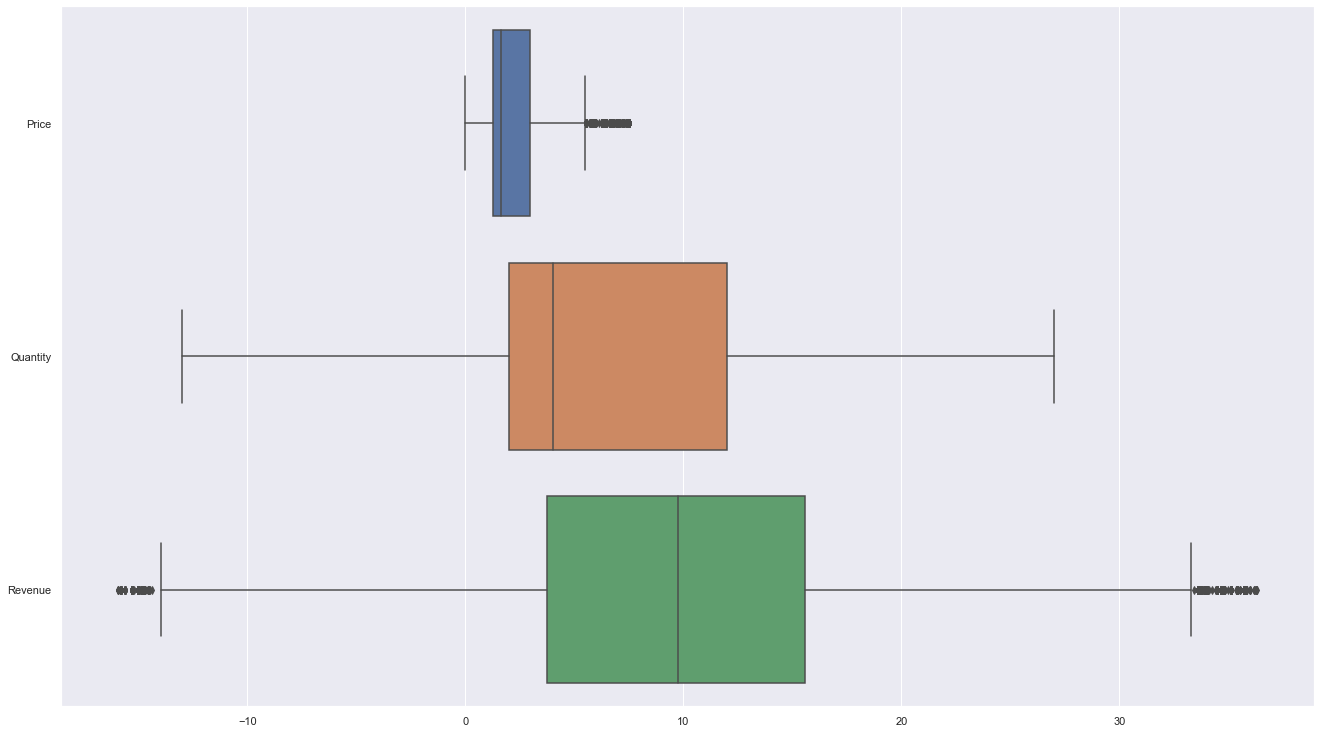

In [127]:
# Plotting BoxPlots for the Bill Amount
sns.set(rc={'figure.figsize':(20,12)})
sns.boxplot(data=df_year_2009_2011_clean[['Price','Quantity','Revenue']], orient="h")
plt.show()

In [128]:
print("PRICE")
print("{:.2f} % of the transactions made were less than £8.".format(df_year_2009_2011_clean[df_year_2009_2011_clean['Price']<=10].shape[0]/df_year_2009_2011_clean['Price'].shape[0]*100))
print("{:.2f} % of the transactions made were negative.".format(df_year_2009_2011_clean[df_year_2009_2011_clean['Price']<0].shape[0]/df_year_2009_2011_clean['Price'].shape[0]*100))

print("QUANTITY")
print("{:.2f} % of the transactions made with less than 25quantity .".format(df_year_2009_2011_clean[df_year_2009_2011_clean['Quantity']<=25].shape[0]/df_year_2009_2011_clean['Price'].shape[0]*100))
print("{:.2f} % of the transactions made were wtih negative quantity.".format(df_year_2009_2011_clean[df_year_2009_2011_clean['Quantity']<0].shape[0]/df_year_2009_2011_clean['Price'].shape[0]*100))


PRICE
100.00 % of the transactions made were less than £8.
0.00 % of the transactions made were negative.
QUANTITY
99.99 % of the transactions made with less than 25quantity .
1.67 % of the transactions made were wtih negative quantity.


<AxesSubplot:xlabel='Description'>

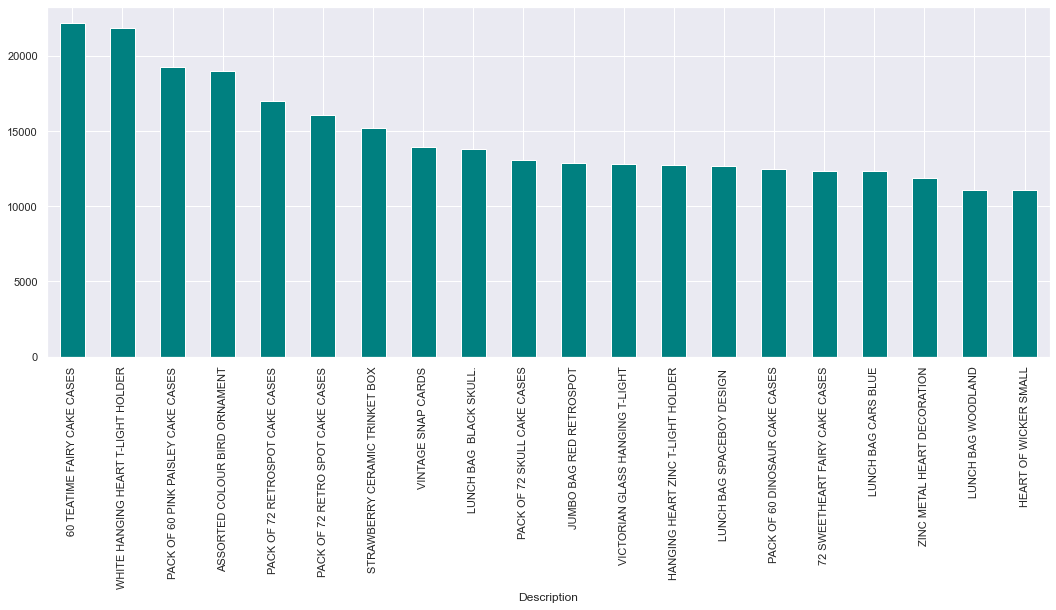

In [129]:
plt.figure(figsize=(16,6))
df_year_2009_2011_clean.groupby("Description").sum().sort_values(by = "Quantity", ascending = False).head(20)["Quantity"].plot(kind = "bar", color = 'teal')

<AxesSubplot:xlabel='Description'>

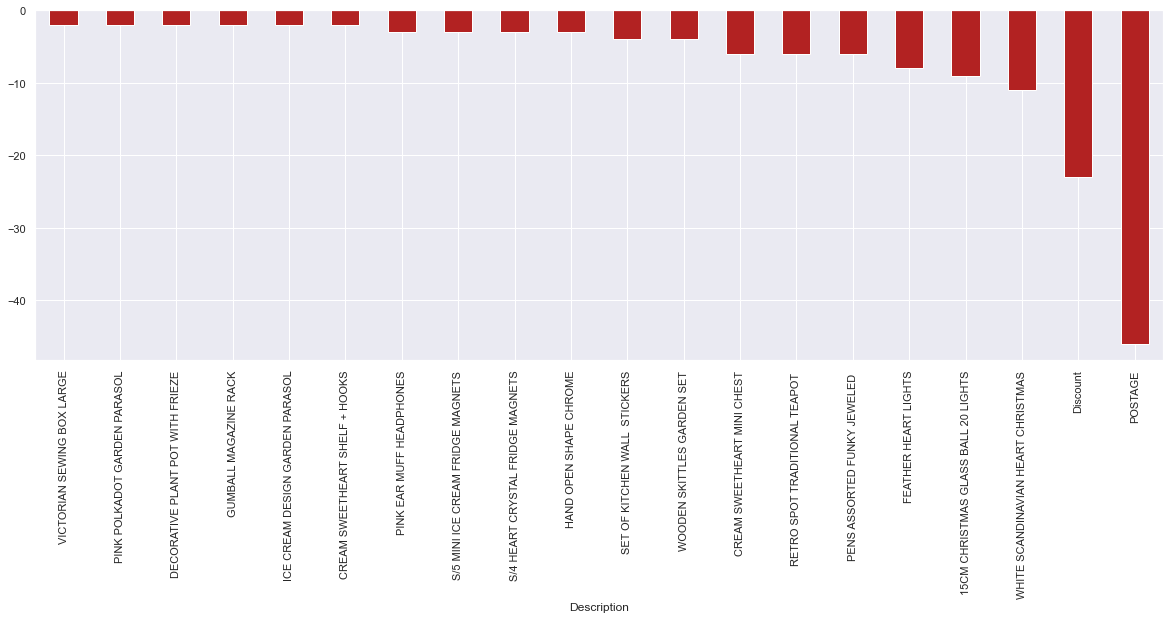

In [130]:
plt.figure(figsize=(18,6))
df_year_2009_2011_clean.groupby("Description").sum().sort_values(by = "Quantity", ascending = False).tail(20)["Quantity"].plot(kind = "bar", color = 'firebrick')

###### <font color='blue'>All stastistical outliers are removed</font>

In [131]:
df_year_2009_2011_clean[ df_year_2009_2011_clean['Invoice'].str.contains('C')==True].count()

Invoice             10457
StockCode           10457
Description         10457
Quantity            10457
InvoiceDate         10457
Price               10457
Customer ID         10457
Country             10457
Revenue             10457
Month               10457
Time                10457
Year                10457
Day                 10457
Quarter             10457
Week_Day            10457
BillingMonthYear    10457
dtype: int64

###### <font color='blue'>10457 cancelled transactions </font>

###### <font color='red'>Later in this study i want to find out the impact of cancelled order on modelling hence exporting the data to perform two seperate analysis </font>

In [132]:
df_year_2009_2011_clean.to_excel("df_year_2009_2011_clean_with_C.xlsx", index=False)

###### <font color='blue'>All the cancelled transactions are going to be removed now</font>

In [133]:
df_year_2009_2011_clean=df_year_2009_2011_clean[ df_year_2009_2011_clean['Invoice'].str.contains('C')!=True]

In [134]:
df_year_2009_2011_clean.head()

Invoice StockCode                         Description  Quantity  \
4   489434  21232     STRAWBERRY CERAMIC TRINKET BOX      24         
6   489434  21871     SAVE THE PLANET MUG                 24         
8   489435  22350     CAT BOWL                            12         
11  489435  22353     LUNCHBOX WITH CUTLERY FAIRY CAKES   12         
14  489436  21754     HOME BUILDING BLOCK WORD            3          

           InvoiceDate  Price  Customer ID         Country  Revenue  Month  \
4  2009-12-01 07:45:00  1.25   13085        United Kingdom  30.00    12      
6  2009-12-01 07:45:00  1.25   13085        United Kingdom  30.00    12      
8  2009-12-01 07:46:00  2.55   13085        United Kingdom  30.60    12      
11 2009-12-01 07:46:00  2.55   13085        United Kingdom  30.60    12      
14 2009-12-01 09:06:00  5.95   13078        United Kingdom  17.85    12      

        Time  Year  Day  Quarter Week_Day  BillingMonthYear  
4   07:45:00  2009  1    4        Tuesday  200912            
6   07:45:00  2009  1    4        Tuesday  200912            
8   07:46:00  2009  1    4        Tuesday  200912            
11  07:46:00  2009  1    4        Tuesday  200912            
14  09:06:00  2009  1    4        Tuesday  200912

###### <font color='blue'>No null values</font> 

In [135]:
df_year_2009_2011_clean.sort_values('Quantity').head(5)

Invoice StockCode                   Description  Quantity  \
225963  556776  21882     SKULLS TAPE                   1          
223774  511065  21749     LARGE RED RETROSPOT WINDMILL  1          
223776  511065  22090     PAPER BUNTING RETRO SPOTS     1          
223780  511065  85185D    FROG SOCK PUPPET              1          
223781  511065  85185B    PINK HORSE SOCK PUPPET        1          

               InvoiceDate  Price  Customer ID         Country  Revenue  \
225963 2011-06-14 12:24:00  0.65   14730        United Kingdom  0.65      
223774 2010-06-06 12:52:00  2.10   17954        United Kingdom  2.10      
223776 2010-06-06 12:52:00  2.95   17954        United Kingdom  2.95      
223780 2010-06-06 12:52:00  2.95   17954        United Kingdom  2.95      
223781 2010-06-06 12:52:00  2.95   17954        United Kingdom  2.95      

        Month      Time  Year  Day  Quarter Week_Day  BillingMonthYear  
225963  6      12:24:00  2011  14   2        Tuesday  201106            
223774  6      12:52:00  2010  6    2        Sunday   201006            
223776  6      12:52:00  2010  6    2        Sunday   201006            
223780  6      12:52:00  2010  6    2        Sunday   201006            
223781  6      12:52:00  2010  6    2        Sunday   201006

###### <font color='blue'>No negative quantity data</font> 

In [136]:
test=df_year_2009_2011_clean.copy()
test['Invoice'] =test['Invoice'].astype('str') 
test["Cancelled_Invoice"] =  test['Invoice'].str.contains('C')
test.groupby("Cancelled_Invoice").count()   
 

Invoice  StockCode  Description  Quantity  InvoiceDate  \
Cancelled_Invoice                                                           
False              615051   615051     615051       615051    615051        

                    Price  Customer ID  Country  Revenue   Month    Time  \
Cancelled_Invoice                                                          
False              615051  615051       615051   615051   615051  615051   

                     Year     Day  Quarter  Week_Day  BillingMonthYear  
Cancelled_Invoice                                                       
False              615051  615051  615051   615051    615051

###### <font color='blue'>No cancelled transactions</font> 

In [137]:
#df_uk_clean[df_uk_clean["Description"] == "This is a test product."]#.count()
df_year_2009_2011_clean[df_year_2009_2011_clean['StockCode'].str.contains("TEST", na=False)].head()

Invoice StockCode              Description  Quantity  \
28251  491742  TEST001   This is a test product.  5          
28254  491744  TEST001   This is a test product.  5          
39398  492718  TEST001   This is a test product.  5          
39411  492722  TEST002   This is a test product.  1          
45228  493410  TEST001   This is a test product.  5          

              InvoiceDate  Price  Customer ID         Country  Revenue  Month  \
28251 2009-12-14 11:00:00  4.5    12346        United Kingdom  22.5     12      
28254 2009-12-14 11:02:00  4.5    12346        United Kingdom  22.5     12      
39398 2009-12-18 10:47:00  4.5    12346        United Kingdom  22.5     12      
39411 2009-12-18 10:55:00  1.0    12346        United Kingdom  1.0      12      
45228 2010-01-04 09:24:00  4.5    12346        United Kingdom  22.5     1       

           Time  Year  Day  Quarter Week_Day  BillingMonthYear  
28251  11:00:00  2009  14   4        Monday   200912            
28254  11:02:00  2009  14   4        Monday   200912            
39398  10:47:00  2009  18   4        Friday   200912            
39411  10:55:00  2009  18   4        Friday   200912            
45228  09:24:00  2010  4    1        Monday   201001

In [138]:
display(df_year_2009_2011_clean.sort_values('Customer ID')[:5])

Invoice StockCode                    Description  Quantity  \
253035  513774  22690     DOORMAT HOME SWEET HOME BLUE   1          
253044  513774  22366     DOORMAT AIRMAIL                1          
253043  513774  48187     DOORMAT NEW ENGLAND            1          
253042  513774  48188     DOORMAT WELCOME PUPPIES        1          
253041  513774  22688     DOORMAT PEACE ON EARTH BLUE    1          

               InvoiceDate  Price  Customer ID         Country  Revenue  \
253035 2010-06-28 13:53:00  7.49   12346        United Kingdom  7.49      
253044 2010-06-28 13:53:00  7.49   12346        United Kingdom  7.49      
253043 2010-06-28 13:53:00  7.49   12346        United Kingdom  7.49      
253042 2010-06-28 13:53:00  7.49   12346        United Kingdom  7.49      
253041 2010-06-28 13:53:00  7.49   12346        United Kingdom  7.49      

        Month      Time  Year  Day  Quarter Week_Day  BillingMonthYear  
253035  6      13:53:00  2010  28   2        Monday   201006            
253044  6      13:53:00  2010  28   2        Monday   201006            
253043  6      13:53:00  2010  28   2        Monday   201006            
253042  6      13:53:00  2010  28   2        Monday   201006            
253041  6      13:53:00  2010  28   2        Monday   201006

In [139]:
df_year_2009_2011_clean.to_excel("df_year_2009_2011_clean_without_C.xlsx", index=False)

___
## 3. Conclusion

In this section we did basis data cleansing and featue engineering to generate insight from the cleaned data. We also did univariate and bivariate analysis
